In [1]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

The key is already registered


Done loading notebook! We're good to go!


<div class="namebox">    
Double Click to edit and enter your

1.  Hugo Wan
2.  twan012
3.  twan012@ucr.edu
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment 4: Exploiting the features of modern processors
</div>

In this assignment, you'll learn about the concepts of:

1. Function calls and compiler optimizations
2. Instruction-level parallelism
3. Memory level parallelsim
4. Superscalar/out-of-order pipeline
5. Branch prediction

You are strongly encouraged to go through the following documents before starting.
1.  The x86-64 assembly http://www.cs.cmu.edu/~fp/courses/15213-s06/misc/asm64-handout.pdf
2.  Intel Sky Lake CPU Architectures https://ieeexplore.ieee.org/document/7924286/

This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

## Keeping Your Assignment Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza when an update is avaiassignmentle.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  **Save your notebook in the browser first**.


```
cd <your directory for this assignment>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment. It will fail 
                                              # harmlessly if you run it more than once.
cp assignment.ipynb assignment.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:


In [78]:
# Important!!! Be sure to click save to preseve your progress before using the following script
! ./fix-repo
! ./pull-updates
# Then reload this page in your browser!!!

fatal: remote upstream already exists.
[main 56f08ed] My progress so far.
 1 file changed, 3090 insertions(+), 67 deletions(-)
From github.com:CS203UCR/2025fa-cs203-processor-starter
 * branch            main       -> FETCH_HEAD
Already up to date.


**Important: Then, reload this page in your browser.**

# About Assignments In This Class

_This section is the same in all the assignments.  It's repeated here for your reference._

CS203 assignments are designed in a way to **learn by doing**.  This means you _must_ **do**.  WE have built these assignments as Jupyter notebooks so that the "doing" is as easy and seamless as possible. (Largely contributed by Steven Swanson at UCSD https://cseweb.ucr.edu/~swanson/)

In this assignment, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the assignment asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

You'll notice that there are three kinds of questions: "Correctness", "Challenging", and "Completeness". 

<div class="alert alert-block alert-success">

**Correctness**: You need to answer these questions with correct answers and supporting evidences (e.g., explainations, formula, equations) to get credits.

</div>
<div class="alert alert-block alert-warning">

**Challenging**: These questions are also graded by correctness, but they account for 20% of the grades in this assignment in total as they're more difficult or repetitive. 

</div>

<div class="alert alert-block alert-info">

**Completeness**: You need to complete all these questions to receive credits. We do not grade these questions on correctness, but you need to show significant efforts regarding your process of deriving the answers.

</div>

In other words, 
- If you want to get full credits, you need to answer all **Correctness** and **Challenging** correctly, and finish all **Completeness** questions.
- If you want to get 80% of the credits, you still need to answer all **Correctness** correctly and finish **Completeness** questions.

Many of our questions must answer based on prior experimental results. If you skip any prior cell, you may get a parsing error in questions from our autograder.

Some of the "Completeness" problems include a solution that will be hidden until you click the triangle below the question.  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss questions with your classmatesm, but you must complete all questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the assignments

Here are some simple tips that will help you do well on this assignment:

1.  Read/skim through the entire assignment and review the lecture/textbook. 
2.  Start early.  Getting answers on discord can take time.  So think through the questions (and your questions about them) carefully.
    1. Go through the assignment once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The gradescope server/cluster can be busy and slow near deadlines.  **"The gradescope server/cluster was slow the night of the deadline"** is **not an excuse** for not getting the assignment done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on discord.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the assignment was announced!"  Good thought!

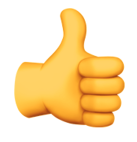

<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** and our machines will get crowded and slow _before every deadline_.  This is completely predictable.  The cluster can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this assignment.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the assignment.
4.  If you get a message like `render_code is not defined`, please make sure you've run all the code cells above your current point in the assignment.
5.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
6.  If all else fails, post a question to discord or visit an office hour.

## Posting Answerable Questions on Discord

If you want useful answers on discord, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which assignment are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cs203` you _must_ provide the job id.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an discord post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the discord question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on discord.  We will archive it and ask you to re-post your question with the information we need.
    
**We Can't Answer Questions 24/7** Please respect the fact that the TAs/instructors are real human beings and we have limitations and other job commitments. Please give people at least 24 hours to answer a question. In other words, you should not expect a question 24 hours before the deadline to be answered in time.
    
</div>

## How To Use This Document

You will use Jupyter Notebook to complete this assignment.  You should be able to do much of this assignment without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [3]:
print("I'm in python")

I'm in python


Code cells can also execute shell commands using the `!` operator.  Try it below:

In [4]:
!echo "I'm in a shell"

I'm in a shell


### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

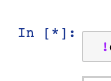


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

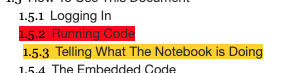

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

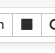

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

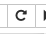

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  Sometimes `cs203 run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
4. If you get errors similar to `NameError: name 'render_csv' is not defined`, please re-execute the very beginning cell of this document.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-danger">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.
7. Many of our questions must answer based on prior experimental results. If you skip any prior cell, you may get a parsing error in questions from our autograder.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Challenging". 

- Correctness: You need to answer these questions with correct answers and supporting evidences (e.g., explainations, formula, equations) to get credits.

- Challenging: These questions are also graded by correctness, but they account for 20% of the grades in this assignment in total as they're more difficult or repetitive.

- Completeness: You need to complete all these questions to receive credits. We do not grade these questions on correctness, but you need to show significant efforts regarding your process of deriving the answers.

### Regarding Our Autograder

In this class, we introduced the autograder on Gradescope. However, please be aware the purpose of autograder is to replace the TA and potentially give you early feedback of your assignment if you submit early. The autograder is not intended to give you a short-cut of receiving full credits in assignments. Here are some disclaimers about our autograders and tips regarding how to compose good answers.

1. Please provide **detailed** explainations and processes, not just the answer. Please consider the autograder as a real TA/professor. We want to see how you get an answer, not just the answer itself.
2. Please use the **precise** terminology/wording as we teach/use in the class/assignment. Being precise is very important in communications and collaborative environments.  
3. Please use the **exact** numbers from your measurements and please don't round your computation result if appropriate. For many questions that ask you to evaluate the answers using the real performance counter results, the autograder will parse some prior cells and grade your answers based on the experimental result. The autograder cannot correctly identify if you really use those results if you round your numbers from the output of the performance numbers.
4. Please have the **right expectations** of the response from the autograder. As a normal TA/instructor, the autograder's response is not to tell you how to get a correct answer, but only provide a general feedback regarding where/what you might get wrong. If you really need personalized help or clarification regarding the concept of questions, please consider visiting an office hour or asking on discord at an appropriate timeslot.
5. Please be aware that autograder are already **more relaxed** than the TAs/instructor. The autograder are more flexible than the TAs/instructor since we cannot have too complex heuristics in the autograder. That also means that you have to pay attention to the released solution. Getting full credits from the autograder does not mean you will get the same when the TAs/instructor grade the same question.

# Meeting Our Processor Again$^2$
In this assignment, we continue using our Intel Xeon Gold 6140 processor. Now, we will dive more into this processor and connect the processor with what you've learn in class.

Intel Xeon Gold 6140 using Intel's Sky Lake architecture. You may find more detail about this processor architecture from the following paper [Inside 6th-Generation Intel Core: New Microarchitecture Code-Named Skylake](https://ieeexplore.ieee.org/document/7924286).

In [5]:
! cs203 run 'lscpu'

Running on the cloud for: twan012@ucr.edu
Architecture:                         x86_64
CPU op-mode(s):                       32-bit, 64-bit
Byte Order:                           Little Endian
Address sizes:                        46 bits physical, 48 bits virtual
CPU(s):                               72
On-line CPU(s) list:                  0-71
Thread(s) per core:                   2
Core(s) per socket:                   18
Socket(s):                            2
NUMA node(s):                         2
Vendor ID:                            GenuineIntel
CPU family:                           6
Model:                                85
Model name:                           Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz
Stepping:                             4
CPU MHz:                              2300.000
CPU max MHz:                          3700.0000
CPU min MHz:                          1000.0000
BogoMIPS:                             4600.00
Virtualization:                       VT-x
L1d cach

Since Sky Lake is an x86 processor, you're strongly encourage to review x86 assembly before starting the rest of the assignment. You may find [this link](https://www.cs.virginia.edu/~evans/cs216/guides/x86.html) useful 

# Compiler optimizations

Compiler optimizations affect program performance through more intelligent use of instrcutons.  Besides register assignment that we've learned from the previous assignment, there are more optimizations. In the exercises below, we'll look at some of the most important optimizations that compilers perform and why and how they work on modern processors.

We have several goals:

1.  To provide some intuition about what the compiler can and cannot do, so you can predict when it will need your help and when you should trust it to "do the right thing".
2.  To see how and why optimization is so important for languages like C++.
3.  To gain further insight into how a computation is implemented affects its performance (via the performance equation).

## Common sub-expression elimination

A _common sub-expression_ is a piece of repeated computation in a program.  Since calculating the same thing twice is a waste of time, the compiler will eliminate the second instance and reuse the result of the first.  Here's an example:

In [6]:
CSE = build(code(r"""
extern "C" int foo(register int a, register int b){
   register int c = a * b;
   return a * b + c;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([CSE[0].source("foo"),CSE[0].asm("foo"),CSE[1].asm("foo")],["source", CSE[0].get_build_parameters(), CSE[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

Again, the unoptimized code does some inefficient things.  I encourage you to trace through the assignments/`movl`s (`a` is in `%edi` and `b` is in `%esi`), but the key thing is that it performs two `imull` instructions that compute the same result.

The optimized code, just computes the product once and stores it in `%edi`.  Then it use `leal` to add `%rdi` to itself. and store the result in `%eax`.  

<div class="alert alert-block alert-danger">

**Pro Tip; `lea` in action** Recall that `leal` computes the effective address of it's first argument and stores that address in its second argument.  In this case, it uses the `(r1,r2)` addressing mode which adds `r1` and `r2` together to compute the effective address.  Using `leal` in this way is a very common idiom in x86 assembly, because most x86 instructions overwrite one argument.  `lea`, however, does not.
    
</div>

It's useful to know what common sub-expressions the compiler can eliminate because it lets you write more natural code.  Consider these two (equivalent) code snippets:

```
if (k < array[len - 1] ) {
   k = array[len - 1];
}
```
and 

```
int t = len - 1;
if (k < array[t] ) {
   k = array[t];
}
```

In the second, the programmer has effectively performed common sub-expression elimination explicitly leading to longer and (I would argue) less readable code.  

A programmer without the benefit of CS203L might think the longer code is faster, but the savvy alumnus of this class will know they can rely on the compiler to eliminate the extra work automatically.

## Loop invariant code motion

_Loop invariant code motion_ identifies computations in the body of a loop that don't change from one iteration to the next.  The compiler can _hoist_ that code out of the loop, saving instructions.  For example:

In [7]:
LICM = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int c = 0;
    for(register int i = 0; i < a; i++) {
        c += b*a;
    }
    return c;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([LICM[0].asm("foo"),LICM[1].asm("foo")],[LICM[0].get_build_parameters(), LICM[1].get_build_parameters()])

#display(unopt.source)
#compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])
#compare([unopt.cfg, opt.cfg], ["Unoptimized", "Optimized (-O1)"])

  0%|          | 0/2 [00:00<?, ?it/s]

Quite a bit changes when we turn on optimizations, but the key thing to notice is that the unoptimized code has an `imull` in the loop body while the optimized code does not.  In the optimized code, the `imull` has been moved into a new basic block called a _loop header_.

## Strength reduction

In _strength reduction_ the compiler converts a "stronger" (i.e., more general and/or slower) operation into a "weaker" (i.e. less general and/or faster) operation.  The most common example is converting multiplication and division by powers of two into left and right shifts.

For example:

In [8]:
SR = build(code(r"""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

We don't even need to look at the optimized code to find strength reduction.  Strength reduction is such a common optimization that the compiler does it even when we tell it not to optimize.  Note that there is no `mull` instruction, but there is a shift arithmetic left long (`sall`) instruction with a constant `$3` that multiplies `%eax` by 8.

The optimized code does one better and folds the whole function in one `leal`.  The `n(,%r,k)` addressing mode multiplies register `%r` times `k` and adds it to `n`.  `k` must be power of two, which means that the processor can use a left shift to implement it.

Changing multiplies and divides in to shifts is not the only kind of strength reduction that is possible.  In the fiddle below change the `a*8` to the expressions given in the question below and see what the compiler does:

In [9]:
SR2 = build(code(r"""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}
int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR2[0].asm("foo"),SR2[1].asm("foo")],[SR2[0].get_build_parameters(), SR2[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

<div class="alert alert-block alert-warning">


<div class="question">

### Question 1 (Challenging)    


Try replacing `a*8` with each of the following. 

|        | What the compiler did | 
|--------|-----------------------|
| `a*3`   |  |  
| `a*5`|  |
| `a*11`|  |
| `a/b`| |
| `a/3`| |

Describe what the compiler does.
    
You will need to leverage the code in the cell above and put your modifications in the following cell, and then explain the observations in the cell after the code cell.
    
</div>
</div>

In [111]:
# Please put your command that runs the program and result here.
SR2 = build(code("""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a * 3;
}

int main(){
    return foo(1, 0);
}
"""), build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

SR2 = build(code("""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a * 5;
}

int main(){
    return foo(1, 0);
}
"""), build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

SR2 = build(code("""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a * 11;
}

int main(){
    return foo(1, 0);
}
"""), build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

SR2 = build(code("""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a / b;
}

int main(){
    return foo(1, 2);
}
"""), build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

SR2 = build(code("""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a / 3;
}

int main(){
    return foo(1, 2);
}
"""), build_parameters=arg_map(OPTIMIZE=["-O0", "-O1"]))

compare([SR[0].asm("foo"),SR[1].asm("foo")],[SR[0].get_build_parameters(), SR[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

<div class="alert alert-block alert-warning">

<div class="answer">

|        | What the compiler did | 
|--------|-----------------------|
| `a*3`  | The compiler performs `strength reduction` because 3 is a compile-time constant. |  
| `a*5`  | The compiler applies `strength reduction` because 5 is a constant. |
| `a*11` | Multiplication by 11 allows the compiler to apply `strength reduction` and eliminate the `imul`. |
| `a/b`  | When the divisor `b` is not a compile-time constant, the compiler cannot apply strength reduction. |
| `a/3`  | The compiler can optimize because 3 is a compile-time constant. |

Optimization Explanation:
1. $a * 3$:
At -O0, the compiler removes the imul and emits sall $3, %eax, which shifts the value left by 3 bits instead of performing a multiplication. \
At -O1, the compiler further optimizes this by using leal 0(,%rdi,8), %eax, which computes a*8 using the LEA addressing mode. \
In both cases, the compiler avoids the slower integer multiply and replaces it with cheaper shift/LEA operations.

2. $a * 5$:
At -O0, the generated code removes the imul instruction and uses sall $3, %eax, which corresponds to a shift-left. \
At -O1, the compiler optimizes more aggressively and emits leal 0(,%rdi,8), %eax, taking advantage of LEA’s scaled addressing mode to compute the result without an explicit multiply. \
This demonstrates that constant multiplication is replaced with faster operations that the hardware can execute more efficiently.

3. $a * 11$:
At -O0, the compiler simplifies the computation and again uses sall $3, %eax, replacing the more expensive multiply with a shift instruction. \
At -O1, the compiler emits leal 0(,%rdi,8), %eax, using LEA to compute the scaled value directly instead of generating an integer multiply. \
This reflects the compiler’s strategy of breaking constant multiplication into cheaper shift/add or LEA operations.

4. $a / b$:
At -O0, it emits the straightforward integer-division sequence using idivl, since correctness must be preserved. \
At -O1, the compiler cleans up register usage and instruction ordering but still relies on the same idivl instruction. \
Because b can vary at runtime, the compiler cannot replace the divide with shifts, multiplies, or magic-number transformations. \
Integer division by a variable is inherently expensive, so no meaningful optimization is possible beyond basic code motion and register allocation.

5. $a / 3$:
At -O0, the compiler still emits the normal integer division sequence using idiv, since optimizations are disabled. \
However, at -O1, the compiler replaces the expensive divide instruction with a faster multiply-and-shift sequence. \
It multiplies a by a precomputed “magic number” that approximates 1/3, and then shifts the result to complete the division. \
This is the standard strength-reduction transformation used for constant division. \
As a result, the optimized version no longer uses idiv, and the computation becomes much faster.

</div>
</div>
</div>

## Constant propagation

_Constant propagation_ allows the compiler to identify the value of constant expressions at compile time and use those constant values to simplify computations.  This effectively executes part of the program _at compile time_ and embeds the result in the assembly.

For example:

In [17]:
CP = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int c = 4;
    register int d = 4;
    return a + c + d;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1 -fno-inline"]))

compare([CP[0].asm("foo"),CP[1].asm("foo")],[CP[0].get_build_parameters(), CP[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

Again, the compiler is doing multiple things at once, but the constant propagation is visible:  In the unoptimized code, it moves `$4` into both `%r12d` and `%ebx` and then adds both those register to `%eax` on the next two lines.  In the optimized code it's folded both `4`s into the `8` in the `leal` instruction.  Here, `leal` is using the `n(%r)` addressing mode which adds a constant `n` to `%r`.  In this case, that enough to implement the entire function.

So what happened to variables `c` and `d`?  They are gone!

The compiler can make bigger things disappear:

In [18]:
CP2 = build(code(r"""
extern "C" int foo(register int a, register int b){
    register int i, s = 0;
    for(i = 0; i < 10; i++) {
        s+= i;
    }
    return s;
}

int main(){
    return foo(1, 0);
}
"""),build_parameters=arg_map(OPTIMIZE=["-O0", "-O1 -fno-inline"]))

compare([CP2[0].asm("foo"),CP2[1].asm("foo")],[CP2[0].get_build_parameters(), CP2[1].get_build_parameters()])

  0%|          | 0/2 [00:00<?, ?it/s]

Since the compiler can evaluate the whole loop at compile time, it does.
Bye, bye loop!  

![Bye bye](https://media3.giphy.com/media/SABGACIrfegQ4O1Aey/200w.webp?cid=ecf05e47aa8u3emxknrkw6fv3rpkesce1x1nog5t1hjpoang&rid=200w.webp&ct=g)

# Practical Rules For Using Compiler Optimizations

The single most important lesson to learn from this assignment is that you should compile your code with optimizations turned on.  It is the easiest 2-10x boost in performance you can get.

Fortunately, it's pretty simple to do that.  Somewhat overwhelmingly, Gcc provides around [300 flags](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) that control optimization and a bunch of tunable parameters as well, but in practice you don't need to worry about them.

There are just a handful that are typically useful.  Here's what the gcc docs have to say about them:

* `-O0`: Perform no optimizations.  You should never use this unless you're just playing around.
* `-O1`: "the compiler tries to reduce code size and execution time, without performing any optimizations that take a great deal of compilation time."
* `-O2`: "GCC performs nearly all supported optimizations that do not involve a space-speed tradeoff."  "Space" in this context means the number of static instructions generated.
* `-O3`: "Optimize yet more"
* `-Og`: "Optimize debugging experience. -Og should be the optimization level of choice for the standard edit-compile-debug cycle, offering a reasonable level of optimization while maintaining fast compilation and a good debugging experience."

Among these, `-Og` is a relatively new flag that "optimizes the debugging experience".  What does that mean?  The optimizations we described above (especially function inlining, but others as well) can cause strange behavior when you debug.  For instance, consider the inlined version of `one()` in the previous section.  If you set a break point on `std::sort()`, your code would never stop because that function is never called.  Likewise, we've seen loops and variables disappear.  This can make debugging really difficult.  On the other hand, compiling with `-O0` will make the code much, much slower (just look at the graphs above).  So `-Og` strikes a balance:  It optimizes but avoids these problems in debugging.

# The Perils of C++

C++ is a big, complex mess of a language that includes a bunch of powerful tools that make it possible to write fast code without too much pain.  However, all that power translates into a lot of complexity that shows up in the assembly code generated for C++ programs.  
In order to read C++ assembly output, you need to understand a few details about one aspect of this implementation process: linking.

## What Is Linking?

Linking is the final step in compiling a program.  Non-trivial programs are spread across multiple source files that are compiled one-at-a-time into _object files_ (`.o`) that contain binary instructions and static data (e.g., string constants from your code).  Each function and global variable in the object file has a name called a _symbol_.  We say that the object file _defines_ the symbols it contains.  For instance, if `foo.cpp` contains the source code for a function `bar()` then, `foo.o` will define the symbol `bar`.

The code in the object files will also _reference_ symbols defined in other object files.  For instance, if another file, `baz.cpp`, calls `bar`, then `baz.o` will have reference to `bar`.  Prior to linking, that reference is _undefined_.

The linker takes all the `.o` files and copies their contents into a single executable file.  As it copies them it _resolves_ the undefined references.  In 
this example, the linker resolves the undefined reference in `bar.o`  by replacing the reference with pointer to the code for `bar()` in  `foo.o`.

One important thing about linkers is that they are language-agnostic -- the linker will happy link object file generated from C++, C, Go, or Rust as long as the symbols match.

There's a lot more to [linking](https://www.amazon.com/Linkers-Kaufmann-Software-Engineering-Programming/dp/1558604960), but this is enough to see what's problematic about C++.

## C++ Name Mangling

The linker restricts what strings can serve as valid symbols: Symbols must start with a letter (or `_`) and only contain letters, numbers, and `_`.

For C, this poses no problems. If you declare a function `bar` in file `foo.c`:

``` c++
int bar(int a) {
    return 1;
}
```

The compiler will generate exactly one symbol with the name `bar`.   Then you can call it from another file `baz.c`:

```  c++
main() {
     bar(4);
} 
```

and the linker will know what function you mean (i.e., the function named `bar` from `foo.c`).

However, C++ allows function overloading, so we might have this in `foo.cpp`:

``` c++
int bar(int a) {
}

float bar(float a) {
}

```

This will generate two functions, so they need two symbols.  But what symbols should the compiler choose?  The compiler needs a systematic way of naming functions _that includes their type information_.  This will ensure that when we have `baz.cpp` with

``` c++
main() {
    bar(4);
    bar(4.0);
} 
```

The linker will know that we mean to call two different functions.

Things get more complex with templates, since we could have:

``` c++
int bar(const std::map<std::string, std::vector<int>> & a) {
}
```

That's a lot of information to pack into one symbol!

The solution that C++ compilers have adopted is called _name mangling_.  Name mangling is a deterministic, standardized way to convert _any_  function type and type into a unique symbol.

Let's see what it does.  Run the fiddle and answer the question:

In [19]:
fiddle("mangle.cpp", function="foo", opt="-O3", cmdline=r"",
code=r"""
#include<map>
#include<vector>
#include<string>
int foo(int a) {
    return 0;
}

float foo(float a) {
    return 0;
}

int foo(const std::map<std::string, std::vector<int>> & a) {
    return 0;
}
""")
unopt = fiddle("mangle.cpp", function="foo", opt="-O3")
! g++ -O3 -S build/mangle.cpp
compare([do_render_code("build/mangle.cpp"),do_render_code("mangle.s")])

Done code generation...
Done code generation...


<div class="alert alert-block alert-info">

<div class="question completeness">

### Question 2 (Completeness)

<div class="question-text"> What's the mangled name for each of these functions?</div>
</div> 
</div>

<div class="alert alert-block alert-info">
<div class="answer">

| function | mangled name |
|----------|--------------|
| `int foo(int a)` | `_Z3fooi` | 
| `float foo(float a)` | `_Z3foof` | 
| `int foo(const std::map<std::string, std::vector<int>> & a)`| `_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE` |

    
</div>

</div>

As you can see, mangled names make assembly pretty hard to read. To make matters worse, mangled names show up in other places as well (e.g.,  the output of profiling tools).

You'll notice that the full name for `int foo(const std::map<std::string, std::vector<int>> & a)` is very long.  This is because it includes full type names (including the C++ namespace) and all the default template parameters.

## C vs C++ Linkage

The way that the compiler generate symbols for a function is called the function's _linkage_.  We've seen two kinds:  C linkage which just uses the function name  and C++ linkage which uses mangled names.

You might have noticed that some of the code examples have `extern "C"` before some functions.  This is a way of telling the compiler that it should use C linkage for those functions (i.e., just use the function names).  You can use it for one function:

``` c++
extern "C" int foo()
```

or a group of functions:

``` c++
extern "C" {
    int foo(){}
    int bar(){}
}
```

This is useful if you want to call the function from a language other than C++ (e.g., C).  We will use it in the examples, because it makes it easier to refer to the functions.


# Branch performance in modern processors

## Measuring Branch Performance with Performance Counters

We'll again use performance counters to measure cache performance on our bare metal machines in the cloud.  We've use the same tools we've used so far to measure `IC`, `CPI`, `CT` and cache miss rates. This time, let's using performance counters to report the branch instruction performance. 

Do you remember the demo code back to the very first lecture?

In [29]:
compare([do_render_code("array_sort.cpp",show=["//START","END"]),do_render_code("calculate_sum.c",show="calculate_sum")])

Let's measure the branch performance of the for loop that performs similar mission as our demo before in the array_query.cpp:

In [30]:
t = fiddle("array_query.cpp", function="array", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t array(uint64_t * data, uint64_t data_size, uint64_t *queries, uint64_t query_size) {
    uint64_t sum=0;
    for(unsigned int i = 0; i < query_size; i++) {
        for(unsigned int j = 0; j < data_size; j++) {
            if(data[j] <= queries[i])
                sum++;
        }
    }
    return sum;
}

FUNCTION(two_arrays, array);
""")

Done code generation...


<div class="alert alert-block alert-success"><div class="question correctness">

### Question 3 (Correctness)

<div class="question-text">

When `data_size=131072`, how many branch instructions are there in the above `array()` function? Assume the processor uses an advnaced branch predictor similar to the tournament introduced in the class with reasonably long history and high accuracy, what's the accuracy of branch prediction?
</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

**Number of Branch Instructions:** 8388640
    
**Branch prediction accuracy:** 75%
    
**Show your work:**

Explanation:
There are three branches in array(), and here are their branch counts:
1. Outer loop: $$ Outer \ branches = query\_size = 32 $$
2. Inner loop: $$ Inner \ branches = data\_size \times query\_size = 131072 \times 32 = 4194304 $$
3. If-statement: $$ If \ branches = 131072 \times 32 = 4194304 $$

Therefore,
$$ The \ total \ branch \ instructions = 32 + 4194304 + 4194304 = 8388640 $$

Branch prediction accuracy for outer loop and inner loop are 100% because they are regular counting loop; but it's random for if-statement, so 50% accuracy at best. \
Accuracy calculations:
$$ Outer \ correct = 32. \ Inner \ correct = 4194304. \ If \ correct = 0.5 \times 4194304 = 2097152. $$
So,
$$ The \ total \ correct = 32 + 4194304 + 2097152 = 6291488 $$
Recall that,
$$Total \ branches = 8388640 $$
Thus,
$$ Prediction \ accuracy = \frac{6291488}{8388640} \approx 0.75 = 75\% $$


</div>
</div>


Run the cell below to see the measurements.


In [31]:
!rm -f build/array_query.so; make MICROBENCH_OPTIMIZE=-O0 build/array_query.so fiddle.exe
!cs203 run './fiddle.exe -l build/array_query.so -f array -i 1 --sort --detail -s 131072 262144 --size2 4096 16384 -M 3700 -o array_query.csv'

mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/array_query.so build/array_query.cpp
mkdir -p build/
cp *.hpp build/ 
cp  fiddle.cpp build/fiddle.cpp
g++-9  -DHAVE_LINUX_PERF_EVENT_H  -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o build/fiddle.o -c build/fiddle.cpp
mkdir -p build/ 
cp  perfstats.c build/perfstats.c
g++-9 -DHAVE_LINUX_PERF_EVENT_H -O3 -I/home/twan012/2025fa-cs203-processor-HugoWan0504 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o build/perfstats.o -c build/perfstats.c
g++-9 -O0  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
Running on the cloud for: twan012@ucr.edu
Will sort input
registering function: array
Dynamically registering array
Execution started
Execution completed


Now, let's show the result in a table. 

In [32]:
display_mono(render_csv("array_query.csv", columns=["arg1", "function","size", "size2","sorting", "IC", "CPI", "CT","ET", "L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses", "branches", "branch_misses"]))

,index,arg1,function,size,size2,sorting,IC,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses,branches,branch_misses
0,0,1,array,131072,4096,0,6702745444,0.741187,0.474390,2.356763,0.011617,47782946,4113279109,1153214595,103879016
1,1,1,array,131072,4096,1,6711647989,0.334487,0.474068,1.064265,0.011685,47939241,4102773131,1150097280,22769
2,2,1,array,131072,16384,0,26881057735,0.738563,0.474290,9.416247,0.011709,192209322,16415675563,4611818828,417661374
3,3,1,array,131072,16384,1,26854811970,0.333433,0.474738,4.250929,0.011686,192040520,16433697409,4600352074,82074
4,4,1,array,262144,4096,0,13385657084,0.743810,0.474717,4.726471,0.011713,96405789,8230836736,2297757522,208244159
5,5,1,array,262144,4096,1,13395104854,0.335334,0.475662,2.136596,0.011704,96094162,8210714874,2304034978,29982
6,6,1,array,262144,16384,0,53698835858,0.741567,0.474353,18.889348,0.011704,385001172,32894192770,9213024371,833530996
7,7,1,array,262144,16384,1,53656143216,0.335011,0.478817,8.606932,0.011692,384023526,32844466570,9205475029,114870


<div class="alert alert-block alert-success"><div class="question correctness">

### Question 4 (Correctness)

<div class="question-text">

When running the `array()`, if the execution with `arg1` set to 1, fiddle will sort the input data array before running the function. According to the data above, what's the most significant factor make the performance of the `array()` function better when data is sorted? Can you explain?
    </div>
    </div>
    </div>
    

<div class="alert alert-block alert-success">    
<div class="answer">
Answer:

When the input array is sorted (arg1 = 1), the performance of array() improves mainly because branch prediction becomes almost perfect.\
Inside the `array()` function, the condition $if \ (data[i] <= queries[j])$ becomes highly predictable when data is sorted, since the comparisons follow a consistent pattern. \
With sorted data, the processor’s branch predictor quickly learns this pattern and rarely mispredicts.

Looking at the results in the table, we can see a huge reduction in branch misses for the sorted runs compared to the unsorted runs, even though the total number of branch instructions stays the same. \
This drop in mispredictions reduces pipeline flushes and keeps the CPU executing instructions smoothly, which significantly lowers the execution time.

So, the key reason sorted data runs faster is that better branch predictability reduces branch misprediction penalties, making the loop far more efficient.

</div>
</div>
</div>

## Reducing branches

Even though we have highly accuracy branch predictors in modern processors, they can never be perfect. To fundamentally avoid branch miss penalty, the best approach is probably the elimination of branch instructions. 

### Loop unrolling
The first mechanism is loop unrolling. In loop unrolling, the compiler or the programmer "unrolls" a loop so that the loop body contains the computation for multiple iterations of the loop. For instance:

In [33]:
fiddle("unroll0.cpp", function="foo", opt="-O0", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C" 
int foo(uint64_t * data, uint64_t data_size){
    register unsigned int i, sum = 0;
    for(i = 0; i < data_size; i++) {
        sum+= data[i];
    }
    return sum;
}

FUNCTION(one_array, foo);
""")
unopt = fiddle("unroll0.cpp", function="foo", opt="-O1 -funroll-loops")
! gcc -O1 -S build/unroll0.cpp

Done code generation...
Done code generation...


In [34]:
fiddle("unroll1.cpp", function="foo", opt="-O0", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C" 
int foo(uint64_t * data, uint64_t data_size){
    register unsigned int i, sum = 0;
    unsigned int size = data_size >> 3;
    for(i = 0; i < size*8; i++) {
        sum+= data[i];
    }
    for(; i < data_size; i++) {
         sum+= data[i];
    }
    return sum;
}

FUNCTION(one_array, foo);
""")
opt = fiddle("unroll1.cpp", function="foo", opt="-O1 -funroll-loops")
! gcc -O1 -funroll-loops -S build/unroll1.cpp

Done code generation...
Done code generation...


In [35]:
compare([do_render_code("unroll0.s", show=["foo:",".LFE2984"]),do_render_code("unroll1.s", show=["foo:",".LFE2984"])])

<div class="alert alert-block alert-success"><div class="question correctness"> 

### Question 5 (Correctness)

<div class="question-text">

Using the generated x86 assembly code, please estimate the total number of dynamic instructions (the instruction count when executing the program) for the ```foo``` function unroll0.cpp and unroll1.cpp. Assume ```data_size``` is 10000. How many of them are branch instructions?
    
</div>
    </div>
    </div>

<div class="alert alert-block alert-success">   
<div class="answer">

|File  | Total dynamic instructions| Total dynamic branch instructions|
|------|---------|------|
|unroll0.cpp|  50000   |  10000   |
|unroll1.cpp|  13750   |   1250   |

Explanantion:
- unroll0's Dynamic Instructions: \
.L3: \
	addl	(%rdi,%rax,8), %ecx \
	addl	$1, %edx \
	movl	%edx, %eax \
	cmpq	%rsi, %rax \
	jb	.L3

So, per element we execute 4 non-branch + 1 branch = 5 instructions. \
Therefore, with data_size = 10000 iterations:
$$ Total \ dynamic \ instructions = 5 \times 10000 = 50000 $$
$$ Total \ dynamic \ branch \ instructions = 1 \times 10000 = 10000 $$

- unroll1's Dynamic Instructions: \
.L6: \
	addl	(%rdx), %eax \
	addl	8(%rdx), %eax \
	addl	16(%rdx), %eax \
	addl	24(%rdx), %eax \
	addl	32(%rdx), %eax \
	addl	40(%rdx), %eax \
	addl	48(%rdx), %eax \
	addl	56(%rdx), %eax \
	addq	$64, %rdx \
	cmpq	%r9, %rdx \
	jne	.L6

So, each unrolled iteration does 10 non-branch + 1 branch = 11 instructions, but it processes 8 elements. \
Therefore, with data_size = 10000 and unroll factor 8:
$$ Number \ of \ loop \ iterations = \frac{10000}{8} = 1250 $$
Hence,
$$ Total \ dynamic \ instructions = 11 \times 1250 = 13750 $$
$$ Total \ dynamic \ branch \ instructions = 1 \times 1250 = 1250 $$
</div>
</div>
</div>

## Function Call Overhead 

In addition to conditional jumps, function calls are also chances where program may change its control flow.  When you a write a function, the code you write turns into the "body" of the function.  However, the processor has to do some work to _make_ the function call and each function includes some overhead instructions in addition to instructions for code the function contains.  For example, consider this code:

In [36]:
fiddle("prologue.cpp", function="", opt="-O0", cmdline=r"",
code=r"""
long int sum(long int a, long int b) {
    return a + b;
}

int main(){
    return sum(1,2);
}
""")
! make build/prologue.s
render_code("prologue.s")

Done code generation...
make: Warning: File 'build/prologue.cpp' has modification time 6.1 s in the future
mkdir -p build/ 
g++-9 -DHAVE_LINUX_PERF_EVENT_H -I/home/twan012/2025fa-cs203-processor-HugoWan0504 -g  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/prologue.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


// prologue.s:1-278 (278 lines)
	.file	"prologue.cpp"
	.text
.Ltext0:
	.globl	_Z3sumll
	.type	_Z3sumll, @function
_Z3sumll:
.LFB0:
	.file 1 "build/prologue.cpp"
	.loc 1 2 38
	.cfi_startproc
	endbr64
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movq	%rdi, -8(%rbp)
	movq	%rsi, -16(%rbp)
	.loc 1 3 16
	movq	-8(%rbp), %rdx
	movq	-16(%rbp), %rax
	addq	%rdx, %rax
	.loc 1 4 1
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE0:
	.size	_Z3sumll, .-_Z3sumll
	.globl	main
	.type	main, @function
main:
.LFB1:
	.loc 1 6 11
	.cfi_startproc
	endbr64
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	.loc 1 7 15
	movl	$2, %esi
	movl	$1, %edi
	call	_Z3sumll
	.loc 1 8 1
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE1:
	.size	main, .-main
.Letext0:
	.section	.debug_info,"",@progbits
.Ldebug_info0:
	.long	0x97
	.value	0x4
	.long	.Ldebug_abbrev0
	.byte	0x8
	.uleb128 0x1
	.long	.LASF1
	.byte	0x4
	.long	.LASF2
	.long	.LASF3
	.quad	.Ltext0
	.quad	.Letext0-.Ltext0
	.long	.Ldebug_line0
	.uleb128 0x2
	.long	.LASF4
	.byte	0x1
	.byte	0x6
	.byte	0x5
	.long	0x4b
	.quad	.LFB1
	.quad	.LFE1-.LFB1
	.uleb128 0x1
	.byte	0x9c
	.uleb128 0x3
	.byte	0x4
	.byte	0x5
	.string	"int"
	.uleb128 0x4
	.string	"sum"
	.byte	0x1
	.byte	0x2
	.byte	0xa
	.long	.LASF5
	.long	0x93
	.quad	.LFB0
	.quad	.LFE0-.LFB0
	.uleb128 0x1
	.byte	0x9c
	.long	0x93
	.uleb128 0x5
	.string	"a"
	.byte	0x1
	.byte	0x2
	.byte	0x17
	.long	0x93
	.uleb128 0x2
	.byte	0x91
	.sleb128 -24
	.uleb128 0x5
	.string	"b"
	.byte	0x1
	.byte	0x2
	.byte	0x23
	.long	0x93
	.uleb128 0x2
	.byte	0x91
	.sleb128 -32
	.byte	0
	.uleb128 0x6
	.byte	0x8
	.byte	0x5
	.long	.LASF0
	.byte	0
	.section	.debug_abbrev,"",@progbits
.Ldebug_abbrev0:
	.uleb128 0x1
	.uleb128 0x11
	.byte	0x1
	.uleb128 0x25
	.uleb128 0xe
	.uleb128 0x13
	.uleb128 0xb
	.uleb128 0x3
	.uleb128 0xe
	.uleb128 0x1b
	.uleb128 0xe
	.uleb128 0x11
	.uleb128 0x1
	.uleb128 0x12
	.uleb128 0x7
	.uleb128 0x10
	.uleb128 0x17
	.byte	0
	.byte	0
	.uleb128 0x2
	.uleb128 0x2e
	.byte	0
	.uleb128 0x3f
	.uleb128 0x19
	.uleb128 0x3
	.uleb128 0xe
	.uleb128 0x3a
	.uleb128 0xb
	.uleb128 0x3b
	.uleb128 0xb
	.uleb128 0x39
	.uleb128 0xb
	.uleb128 0x49
	.uleb128 0x13
	.uleb128 0x11
	.uleb128 0x1
	.uleb128 0x12
	.uleb128 0x7
	.uleb128 0x40
	.uleb128 0x18
	.uleb128 0x2116
	.uleb128 0x19
	.byte	0
	.byte	0
	.uleb128 0x3
	.uleb128 0x24
	.byte	0
	.uleb128 0xb
	.uleb128 0xb
	.uleb128 0x3e
	.uleb128 0xb
	.uleb128 0x3
	.uleb128 0x8
	.byte	0
	.byte	0
	.uleb128 0x4
	.uleb128 0x2e
	.byte	0x1
	.uleb128 0x3f
	.uleb128 0x19
	.uleb128 0x3
	.uleb128 0x8
	.uleb128 0x3a
	.uleb128 0xb
	.uleb128 0x3b
	.uleb128 0xb
	.uleb128 0x39
	.uleb128 0xb
	.uleb128 0x6e
	.uleb128 0xe
	.uleb128 0x49
	.uleb128 0x13
	.uleb128 0x11
	.uleb128 0x1
	.uleb128 0x12
	.uleb128 0x7
	.uleb128 0x40
	.uleb128 0x18
	.uleb128 0x2117
	.uleb128 0x19
	.uleb128 0x1
	.uleb128 0x13
	.byte	0
	.byte	0
	.uleb128 0x5
	.uleb128 0x5
	.byte	0
	.uleb128 0x3
	.uleb128 0x8
	.uleb128 0x3a
	.uleb128 0xb
	.uleb128 0x3b
	.uleb128 0xb
	.uleb128 0x39
	.uleb128 0xb
	.uleb128 0x49
	.uleb128 0x13
	.uleb128 0x2
	.uleb128 0x18
	.byte	0
	.byte	0
	.uleb128 0x6
	.uleb128 0x24
	.byte	0
	.uleb128 0xb
	.uleb128 0xb
	.uleb128 0x3e
	.uleb128 0xb
	.uleb128 0x3
	.uleb128 0xe
	.byte	0
	.byte	0
	.byte	0
	.section	.debug_aranges,"",@progbits
	.long	0x2c
	.value	0x2
	.long	.Ldebug_info0
	.byte	0x8
	.byte	0
	.value	0
	.value	0
	.quad	.Ltext0
	.quad	.Letext0-.Ltext0
	.quad	0
	.quad	0
	.section	.debug_line,"",@progbits
.Ldebug_line0:
	.section	.debug_str,"MS",@progbits,1
.LASF0:
	.string	"long int"
.LASF5:
	.string	"_Z3sumll"
.LASF1:
	.string	"GNU C++14 9.4.0 -mtune=generic -march=x86-64 -g -fasynchronous-unwind-tables -fstack-protector-strong -fstack-clash-protection -fcf-protection"
.LASF4:
	.string	"main"
.LASF2:
	.string	"build/prologue.cpp"
.LASF3:
	.string	"/home/twan012/2025fa-cs203-processor-HugoWan0504"
	.ident	"GCC: (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0"
	.section	.note

### The Application Binary Interface (ABI)

There are several standardized protocols for how arguments are passed to functions and even how names are mangled.  These protocols are called "application binary interfaces" or ABIs.  It's important that the caller (the function that calls) and the callee (the function that is called) agree on the ABI.   The ABI dictates which arguments go in which register and in what order, the number of bits in an `int` vs a `long int`, how things like pass-by-value vs. pass-by-references are implemented, and how C++ virtual function tables (which implement virtual functions) are laid out. Generally speaking, if two object files (i.e., `.o` files) were compiled with the same ABI, functions in one object file can call functions in another.  

For the most part, you can think of there being one ABI per operating system, but that's not completely accurate.  Linux has (at least) two: one for the kernel and one for user programs.  Microsoft has one.  Intel has defined a standard as well.  The [wikipedia page](https://en.wikipedia.org/wiki/Application_binary_interface) has a little more detail.
    
If you're curious, use the fiddle to see how the compiler passes, `struct`s, pointers to `struct`, and C++ references to `struct`s.  What's surprising about how it implements those three different language constructs?

The body of `sum` is very simple:  It should just be a single add instruction, but instead it has to return as well.   The _call site_ in `main` takes 3 instructions (the `ret` is part of the overhead for calling `main`, not `sum`).

In this case, the _function call overhead_ is four instructions: 1 x `ret`, 2 x `movl`, and 1 x `call`.

### Removing Function Call Overheads

One way to remove the function call overhead is to copy the body of the function (i.e., the useful part) to the caller.  Then, we don't need to pass arguments, make the `call`, or do the `ret`.
The compiler can do this automatically by _inlining_ the function.

For instance, the compiler can inline `foo` into `loop`:

In [37]:
loop_unopt = fiddle("inline1.cpp", function="main", opt="-O0", code="""


extern "C" int inline __attribute__ ((used)) foo( register int a, register int b) { 
    return a + b;
}

int main(int argc, char * argv[]){
    register int i;
    register int s = 0;
    for(i = 0; i < argc; i++) {
        s += foo(i,i);
    }
    return s;
}
""")
!make MICROBENCH_OPTIMIZE="-O0" build/inline1.s
compare([do_render_code("inline1.s", show=["main:",".LFE1:"]),do_render_code("inline1.s", show=["foo:",".LFE0:"])])

Done code generation...
make: Warning: File 'build/inline1.cpp' has modification time 6.1 s in the future
mkdir -p build/ 
g++-9 -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/inline1.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


Now, let's try function inlining.

In [38]:
!make MICROBENCH_OPTIMIZE="-O1 -finline-functions " build/inline1.s
compare([do_render_code("inline1.s", show=["main:",".LFE1:"]),do_render_code("inline1.s", show=["foo:",".LFE0:"])])

make: Warning: File 'build/inline1.cpp' has modification time 2.2 s in the future
mkdir -p build/ 
g++-9 -O1 -finline-functions  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/inline1.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


When the compiler is finished with `loop()` it contains all the code that was in `foo()`.  It also no longer contains a function call at all.

<div class="alert alert-block alert-info">

<div class="question completeness">

### Question 6 (Completeness)    


<div class="question-text">

Based on the change in instruction count (IC), how much speedup does inlining provide in this case? 
    
</div>

</div>
</div>

<div class="alert alert-block alert-info">    
<div class="answer">
Answer:

We can estimate the speedup just from how many instructions execute per loop iteration before and after inlining.

Before inlining: each call to foo executes
- 1 useful instruction in foo’s body (the add / leal that computes a + b), plus
- 4 instructions of call overhead (the call, two mov-style argument moves, and the ret).

So, that’s 5 instructions per iteration.

After inlining: the body of foo is copied directly into loop, so the loop only needs the single instruction that does a + b. \
The four call-overhead instructions disappear, giving 1 instruction per iteration.

Speedup from inlining (based purely on IC) is therefore:
$$ Speedup = \frac{IC \ before}{IC \ after} = \frac{5}{1} = 5 $$

So, inlining can provide about a 5× speedup by eliminating the function-call overhead.
</div>
</div>

<details>Function inlining
    
Without inlining, each trip through `for` loop takes 15 instructions (8 in `loop()` and 7 in `foo()`).  With inlining, it's 4.  
    
How big a difference this makes depends on the value of `argc`.  Let's assume it's large (like 100).  In this case the instructions before and after the loop contribute very little to `IC` and we can ignore them.   So the speedup (ignoring the first and last basic block) approximately 14/4 = 3.5x.
</details>

But this is just the beginning of inlining's power, because it also vastly increases the opportunities to apply other optimizations.  Consider `foo()` in the example above.  Without inlining, the compiler can only apply optimizations that will work for _all_ values of `a` and `b`.  However, once `foo()` is inlined, the compiler can optimize _that copy_ of `foo()` for the values of `a` and `b` at that call site.  Then it is free to apply all the other optimizations we've discussed already.

For instance:

In [40]:
caller_unopt = fiddle("inline2.cpp", opt="-Og", code="""

extern "C" inline int loop(register int a) { 
    register int i;
    register int sum = 0;
    for(i = 0; i < a; i++) {
        sum += i;
    }
    return sum;
}

extern "C" int caller(register int a) {
    return loop(20);
}

int main(){
    caller(1);
}
""")
#caller_opt = fiddle("inline2.cpp", function="caller", run=False, remove_assembly=False, opt="-O3")
#loop_unopt = fiddle("inline2.cpp", function="loop", run=False, remove_assembly=False, opt="-Og -fkeep-inline-functions")

!make MICROBENCH_OPTIMIZE="-Og -fkeep-inline-functions" build/inline2.s
compare([do_render_code("inline2.s", show=["main:",".LFE2:"]),do_render_code("inline2.s", show=["caller:",".LFE1:"]),do_render_code("inline2.s", show=["loop:",".LFE0:"])])

Done code generation...
make: Warning: File 'build/inline2.cpp' has modification time 6.3 s in the future
mkdir -p build/ 
g++-9 -Og -fkeep-inline-functions -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/inline2.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


With inlining and compiler optimizations:

In [41]:
!make MICROBENCH_OPTIMIZE="-O3" build/inline2.s
compare([do_render_code("inline2.s", show=["main:",".LFE2:"]),do_render_code("inline2.s", show=["caller:",".LFE1:"]),do_render_code("inline2.s", show=["loop:",".LFE0:"])])

mkdir -p build/ 
g++-9 -O3 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/inline2.cpp


Bye bye, function call!  Bye Bye, loop!

![bye bye](https://media3.giphy.com/media/tuvMgAPzxaQBq/200.webp?cid=ecf05e47jb4f5ojpiqlpr9o2b5wdn980swe4q4pcbwxmbxcu&rid=200.webp&ct=g)


<div class="alert alert-block alert-info">

<div class="question completeness">

### Question 7 (Completeness)    


<div class="question-text">

Which optimizations did the compiler apply to come up with inlined, optimized version of `caller()`?  For each optimization explain what it accomplished.
    
</div>
</div>
</div>
    

   
<div class="alert alert-block alert-info">

<div class='answer'>
Answer:

In the optimized `caller()` version, the compiler applied several classic optimizations that become possible only after inlining:

1. Function Inlining: \
The compiler fully inlined `foo()` into both `loop()` and then inlined `loop()` into `caller()`. \
This removed all `call`/`ret` overhead and allowed the optimizer to “see” the entire computation in one place.

2. Constant Propagation: \
After inlining, the argument passed to `loop()` (which is always 20) became visible to the optimizer. \
As a result, the compiler replaced the variable loop bound with the known constant 20 everywhere.

3. Loop Unrolling: \
Because the loop bound became a compile-time constant, the compiler unrolled the loop aggressively. \
In assembly (8-line main, 17-line caller, 17-line loop), the loop is partially or fully unrolled depending on `-O3`.

4. Constant Folding: \
After unrolling, the compiler noticed that the loop simply computes a fixed arithmetic sum. \
It evaluated the entire unrolled loop at compile time, reducing the final result to a single `movl $190, %eax` in the optimized `caller()`.

5. Dead-Code Elimination: \
Once the constant result replaced the computation, all intermediate instructions (loop counters, additions, comparisons, branches) were removed entirely. \
This is why optimized `caller()` is only: `movl $190, %eax` \& `ret`

</div>
</div>

</div>

<details>
The compiler applied:
    
1. Inlining -- It merged `foo()` into the loop.
2. constant propagation -- The loop bound becomes constant.
3. Loop unrolling -- It completely unrolled the loop because it has a constant loop bound.
4. constant prop -- It evaluated the unrolled loop at compile time.
</details>

# Instruction Level Parallelism

As you learned in CS203, modern processors can exploit parallelism between instructions by fetching a large "window" of instructions and dynamically identifying instructions that can execute at the same time. The algorithm it uses is pretty amazing and the fact that processors can do this at over 3GHz is mind-blowing.

But how well does it work?  How much ILP can we get?  Where does ILP come from?

## Let's Look at Our Machine

This assignment is using an Intel Skylake processor. Therefore, we will intensively go through some technical details in [Inside 6th-Generation Intel Core: New Microarchitecture Code-Named Skylake
](https://ieeexplore.ieee.org/document/7924286) paper. Figure 4 of the [Inside 6th-Generation Intel Core: New Microarchitecture Code-Named Skylake
](https://ieeexplore.ieee.org/document/7924286) paper provides the block diagram of each core (as we put below).

![image](img/skylake.png)

In the integer block, 4 function units can all execute basic arithmetic operations ("ALU"). Other the side, 4 memory units where 3 ("STA") can execute address calculation instructions like `lea`, and one can only execute store instruction. This means that processor can issue up to 2 memory load operations, 2 `lea` instructions, and 1 store per cycle. According to the paper, the memory subsystem can handle up to 2 64-byte loads, as well as up to one 64-byte stores per cycle, providing simultaneous 128 bytes of read bandwidth and 128 bytes of write bandwidth per cycle.

<div class="alert alert-block alert-success">

<div class="question correctness">
    
### Question 8 (Correctness)

<div class="question-text">
    
Based on Figure 1 in the Intel Sky Lake paper, what's the minimum achievable CPI for ALU operations on our CPU? For load/store operations? For all operations?
    
</div>
    </div>
    </div>

<div class="alert alert-block alert-success">   
<div class="answer">
    
**Minimum possible ALU CPI**: 0.25
    
**Minimum possible load/store CPI**: 0.33

**Minimum possible total CPI**: 0.125

Explanation:
1. ALU CPI: \
Max ALU throughput = 4 ALU ops per cycle \
$$ CPI_{ALU,min} = \frac{1}{4} = 0.25 $$

2. Load/Store CPI: \
Max memory throughput = 2 loads + 1 store per cycle = 3 memory ops per cycle \
$$ CPI_{ALU,min} = \frac{1}{3} = 0.33 $$

3. Total CPI: \
If the code has enough ILP and a good mix of ALU and memory instructions so that all these units stay busy at once, the back end could retire up to: \
4 ALU ops + 3 memory ops + 1 branch op = 8 useful ops per cycle

So, the theoretical best-case back-end CPI is:
$$ CPI_{ALU,min} = \frac{1}{8} = 0.125 $$

</div>
</div>

<details>
   
It appears that the CPU can execute four ALU operations in one cycle.  So the minimum CPI would be 1/4 = 0.25.
    
For loads/stores, it seems we can do up to 3 per cycle, so the CPI should be 1/3 = 0.33 or 2 loads per cycle so 1/2 = 0.5 for loads or 1 stores per cycle, so 1 for stores.

All together (loads, stores, ALU, and **branches**), it appears that 1/8 = 0.125 should be possible.

</details>

<div class="alert alert-block alert-info">

<div class="question completeness">

### Question 9 (Completeness)    

<div class="question-text">
    
Based on this design, do you think the designers are more concerned about achieving parallelism between memory operations or arithmetic (non-memory) operations?
    
</div>
</div>
</div>

<div class="alert alert-block alert-info">
<div class="answer">
Answer:  

They’re clearly putting a lot of effort into memory parallelism: \
Half of the integer execution ports (2, 3, 4, 7) are devoted to loads/stores and address generation, with enough hardware to sustain multiple loads and a store every cycle.

Figure 1 and the surrounding text emphasize the complex cache and memory subsystem (L1/L2/LLC, eDRAM side cache, high LLC bandwidth, deeper store buffers, higher streaming-store bandwidth, etc.) specifically to improve load/store performance and bandwidth. 

There are strong arithmetic resources too (multiple ALUs, vector FMAs), but dedicating so many ports and so much silicon to caches, buffers, and memory bandwidth shows that hiding memory latency and supporting many memory operations in parallel is a primary concern.

</div>
</div>

## Experiments

Here's a simple function (run the code to see it).  I've turned off optimizations and use `register` to get `i` into a register.

Study the code and pay particular attention to the data dependences between the instructions in the inner loop body.

In [43]:
t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=[], 
           cmdline=f"-size 10000000", 
           perf_cmdline="-M 3700")
! rm -f build/ilp.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/ilp.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/ilp.s
compare([do_render_code("ilp.cpp",show="wide_1"),do_render_code("ilp.s", show=["wide_1:",".LFE2876:"])])

Done code generation...
cp ilp.cpp build/
cp *.hpp build/
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O0 -g -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/ilp.so build/ilp.cpp
g++-9 -O0 -g  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
make: Warning: File 'build/ilp.cpp' has modification time 5.7 s in the future
mkdir -p build/ 
g++-9 -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/ilp.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


<div class="alert alert-block alert-success">

<div class="question completeness">

### Question 10 (Correctness)     
    
<div class="question-text">
Looking at the assembly code of `wide_1()`,
what's the critical path length through $n$ iterations of the inner loop body of `wide_1()`?  Based on the dependences in the inner loop (between .L19 and .L18), estimate the CPI for this code (assuming the inner loop runs many, many times).        
</div>
    </div>
    </div>

<div class="alert alert-block alert-success">   
<div class="answer">

1. **critical path**: 5n for n iterations
    
2. **CPI**: 0.56
    
Explanation:
1. Critical path: \
Each iteration has 5 `addq` instructions that all read/write `rbx`, so they must execute one after another. \
Nothing else in the loop is on this dependency chain, so the critical-path latency is 5 cycles per iteration, i.e. 5n cycles for n iterations.

2. CPI: \
There are 9 dynamic instructions in the loop body per iteration, and only 5 of them lie on the critical path. \
So, the effective CPI is:
$$ CPI = \frac{critical-path \ cycles \ per \ iteration}{instructions \ per \ iterations} = \frac{5}{9} = 0.56 $$

</div>
</div>

<details>

All the `addq` instructions in the body read and write `rbx`, so each is dependent on the one prior to it, and there is a cross-loop dependence on `rbx` as well.
    
Further, the `cmpq` is dependent on the last `addq` as well, and the `jnb` is dependent on the `cmpq`. However, they don't add to the critical path for two reasons:
    
1. Nothing is dependent on the `jnb`
2. The `jnb` is a very predictable branch, so it and the `cmpq` will not affect execution very much.  Likewise, we can ignore the `jmp` as well.
    
So, the critical path for $n$ iteration is $5n$.

The nominal latency for an `addq` is 1 cycle, so the latency of $n$ iterations is about $5n$ cycles.    There are 9 instructions per iteration, so `CPI` should be 5/9 = 0.55.

</details>

Let's see how it comes out:

In [44]:
! cs203 run "./fiddle.exe -s 10000000 -M 3700 -l build/ilp.so -f wide_1 -o ilp.csv"

display_mono(render_csv("ilp.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

Running on the cloud for: twan012@ucr.edu
registering function: wide_1
registering function: wide_2
registering function: wide_3
registering function: wide_4
registering function: wide_5
Dynamically registering wide_1
Dynamically registering wide_2
Dynamically registering wide_3
Dynamically registering wide_4
Dynamically registering wide_5
Execution started
Execution completed


,index,function,IC,CPI,CT,ET
0,0,wide_1,90029038,0.556489,0.277045,0.013880


Pretty good agreement!

Let's try another function, ``wide_2``.  Same questions.

In [45]:
t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=[], 
           cmdline=f"-size 10000000", 
           perf_cmdline="-M 3700")
! cs203 run "rm -f build/ilp.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/ilp.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/ilp.s"
compare([do_render_code("ilp.cpp",show="wide_2"),do_render_code("ilp.s", show=["wide_2:","wide_2_reg:"])])

Done code generation...
Running on the cloud for: twan012@ucr.edu
Running on the cloud for: twan012@ucr.edu
Running on the cloud for: twan012@ucr.edu
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O0 -g -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/ilp.so build/ilp.cpp
g++-9 -O0 -g  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
Running on the cloud for: twan012@ucr.edu
mkdir -p build/ 
g++-9 -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/ilp.cpp


<div class="alert alert-block alert-warning">
    


### Question 11 (Challenging)

What's the critical path length through $n$ iterations of inner loop body of `wide_2()`?  Based on the dependences in the inner loop, estimate the CPI for this code (assuming the inner loop runs many, many times).        

</div>

<div class="alert alert-block alert-warning">
<div class="answer">

1. **critical path**: 5n cycles
    
2. **CPI (show your work)**: 0.36

Explanation: \
Determine the dynamic instrucitons: \
.L23: \
	cmpq	-64(%rbp), %rbx \
	jnb	.L22 \
	addq	%rbx, %r12 \
	addq	%rbx, %r13 \
	addq	%rbx, %r12 \
	addq	%rbx, %r13 \
	addq	%rbx, %r12 \
	addq	%rbx, %r13 \
	addq	%rbx, %r12 \
	addq	%rbx, %r13 \
	addq	%rbx, %r12 \
	addq	%rbx, %r13 \
	addq	$1, %rbx \
	jmp	.L23

1. Critical Path: \
Define instruction on the critical path: \
For register %r12 (a): \
addq %rbx, %r12 (1st) \
addq %rbx, %r12 (3rd) \
addq %rbx, %r12 (5th) \
addq %rbx, %r12 (7th) \
addq %rbx, %r12 (9th) \
And for register %r13 (b): \
addq %rbx, %r13 (2nd) \
addq %rbx, %r13 (4th) \
addq %rbx, %r13 (6th) \
addq %rbx, %r13 (8th) \
addq %rbx, %r13 (10th)

Each of these uses the previous value of `%r12`, so they form a single dependence chain. \
An identical chain also exists for `%r13` (b), but it is independent of `%r12`, so we can run the two chains in parallel. \
`cmpq` and the two branches (jnb, jmp) depend on the loop index. \
But as in Q10, they are highly predictable, so we ignore them when we talk about the data critical path. \
The loop index update `addq $1, %rbx` also forms a chain across iterations, but it is only one add per iteration, so that chain is shorter than the `%r12` / `r13` chains.

So, the longest chain per iteration is one of the accumulator chains (say `%r12`):
`addq %rbx,%r12`-> `addq %rbx,%r12` -> `addq %rbx,%r12` -> `addq %rbx,%r12` -> `addq %rbx,%r12`

That gives a critical path length of 5 dependent adds per iteration, or 5n adds over n iterations.

With a 1-cycle latency for an integer add, the critical-path latency is:
$$ Critical \ path \ length = 5n \ cycles $$

2. CPI: \
Count the dynamic instructions per loop iteration in .L23:
$$ Instructions \ per \ iteration = 1 \ cmpq + 1 \ jnb + 11 \ addq + 1 \ jmp = 14 $$
Over n iterations we therefore execute 14n dynamic instructions.

From above, the critical path through those iterations is 5n cycles.
So the estimated CPI based purely on the dependence-limited critical path is:
$$ CPI = \frac{critical-path \ cycles}{dynamic \ instructions} = \frac{5n}{14n} = 0.36 $$
</div>
</div>
</div>

Let's validate your answer to the previous question!

In [47]:
! cs203 run "./fiddle.exe -s 10000000 -M 3700 -l build/ilp.so -f wide_2 -o ilp_2.csv"

display_mono(render_csv("ilp_2.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

Running on the cloud for: twan012@ucr.edu
registering function: wide_1
registering function: wide_2
registering function: wide_3
registering function: wide_4
registering function: wide_5
Dynamically registering wide_1
Dynamically registering wide_2
Dynamically registering wide_3
Dynamically registering wide_4
Dynamically registering wide_5
Execution started
Execution completed


,index,function,IC,CPI,CT,ET
0,0,wide_2,140028653,0.364810,0.286177,0.014619


I have three more of these functions: `wide_3()` through `wide_5()` with more parallel sequences of dependent increments: 

In [48]:
render_code("ilp.cpp", show="wide_5")

! cs203 run "./fiddle.exe -s 10000000 -M 3700 -l build/ilp.so -f wide_1 wide_2 wide_3 wide_4 wide_5 -o ilp_5.csv"

display_mono(render_csv("ilp_5.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

// ilp.cpp:83-100 (18 lines)
uint64_t* wide_5(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
	register uint64_t a = arg1;
	register uint64_t b = arg1 << 1;
	register uint64_t c = arg1 << 2;
	register uint64_t d=  arg1 << 3;
	register uint64_t e = arg1 << 4;
	register uint64_t f= size;

	for(register uint64_t i = 0; i < size; i++) {
		a = a+i;  b = b+i;  c = c+i;  d = d+i;  e = e+i; 
		a = a+i;  b = b+i;  c = c+i;  d = d+i;  e = e+i; 
		a = a+i;  b = b+i;  c = c+i;  d = d+i;  e = e+i;
		a = a+i;  b = b+i;  c = c+i;  d = d+i;  e = e+i; 
		a = a+i;  b = b+i;  c = c+i;  d = d+i;  e = e+i; 
	}
	data[0] = a + b + c +d + e + f;
	return data;
}

Running on the cloud for: twan012@ucr.edu
registering function: wide_1
registering function: wide_2
registering function: wide_3
registering function: wide_4
registering function: wide_5
Dynamically registering wide_1
Dynamically registering wide_2
Dynamically registering wide_3
Dynamically registering wide_4
Dynamically registering wide_5
Execution started
Execution completed


,index,function,IC,CPI,CT,ET
0,0,wide_1,90029268,0.556441,0.282697,0.014162
1,1,wide_2,140028592,0.364920,0.305954,0.015634
2,2,wide_3,190033945,0.319720,0.332353,0.020193
3,3,wide_4,240033945,0.266608,0.333245,0.021326
4,4,wide_5,310047729,0.247740,0.331905,0.025494


,index,function,IC,CPI,ET
0,0,wide_1,90029268,0.556441,0.014162
1,1,wide_2,140028592,0.364920,0.015634
2,2,wide_3,190033945,0.319720,0.020193
3,3,wide_4,240033945,0.266608,0.021326
4,4,wide_5,310047729,0.247740,0.025494


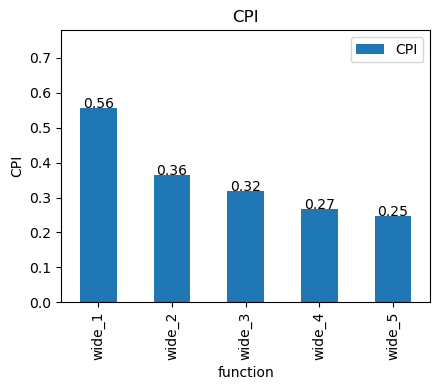

In [49]:
display(render_csv("ilp_5.csv", columns=["function", "IC", "CPI", "ET"]))
plotPEBar("ilp_5.csv", what=[("function", "CPI")])

Wow, we came very close to hitting our theoretical minimum CPI!:  The processor can issue up to 4 arithmetic instructions per cycle. So we got a CPI very close to 0.25.

## Dynamic Loop Unrolling

`wide_5()` is not a very realistic function, since it has an artificially huge amount of ILP.  But ILP can arise in more natural ways as well.

Below is a function that represents a common pattern:  A loop body that computes a value based on the loop index and stores it somewhere.  In this case, the computations is a long chain of additions.   Study it and answer the question below.

In [86]:

t = fiddle("unroll.cpp", function="unroll_1", opt="-O0",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* unroll_1(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    register uint64_t a = 4;

    for(register uint64_t i = 0; i < size; i++) {
       a = i+1;
       a = a+1;       
       a = a+1;       
       a = a+1;       
       a = a+1;       
       data[i] = a;
    }
    data[0] = a;
    return data;
}
FUNCTION(one_array_2arg, unroll_1);
""", 
           cmdline=f"--size 10000000", 
           perf_cmdline="")

Done code generation...


In [87]:
! rm -f build/unroll.so; rm fiddle.exe; make MICROBENCH_OPTIMIZE='-O0 -g' build/unroll.so fiddle.exe; make MICROBENCH_OPTIMIZE=-O0 build/unroll.s
compare([do_render_code("build/unroll.cpp",show="unroll_1"),do_render_code("unroll.s", show=["unroll_1:",".LFE2876:"])])

make: Warning: File 'build/unroll.cpp' has modification time 3.5 s in the future
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O0 -g -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/unroll.so build/unroll.cpp
g++-9 -O0 -g  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
make: warning:  Clock skew detected.  Your build may be incomplete.
make: Warning: File 'build/unroll.cpp' has modification time 3 s in the future
mkdir -p build/ 
g++-9 -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/unroll.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.


<div class="alert alert-block alert-success">

<div class="question completeness">

### Question 12 (Correctness)

<div class="question-text">
What's the critical path length through $n$ iterations of inner loop body of `unroll_1()` (assume $n$ is large)?  Estimate the CPI for this code (assuming the inner loop runs many, many times, and the latency for each instruction is 1).        
</div>
</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">

1. **critical path**: 4n cycles

2. **CPI**: 0.31
    
Explanation: \
Define dynamic instructions: 9 ALU ops (cmpg, leaq, addq) + 2 branch ops (jnb, jmp) + 2 memory ops (movq) = 13n cycles

.L19: \
cmpq -40(\%rbp), \%r12 \
jnb .L18 \
leaq 1(%r12), \%rbx

addq $1, \%rbx (4 times)

leaq 0(,\%r12,8), \%rdx \
movq -32(\%rbp), \%rax \
addq \%rdx, \%rax \
movq \%rbx, (\%rax) \
addq $1, \%r12 \
jmp .L19


The critical path is the dependency chain on \%r12, because \%r12 is the loop-induction variable whose value carries from one iteration into the next.

The instructions on the critical path are: \
cmpq   -40(%rbp), %r12 \
jnb    .L18 \
addq   $1, %r12 \
jmp    .L19

The latency of each of these 4 instructions = 1 cycle. \
And, the total latency of the dependence chain per iteration = 4 cycles.

Therefore the critical path length through n iterations is:
$$ The \ latency \ of \ the \ Critical \ Path = 4n \ cycles. $$

Therefore, CPI is:
$$  CPI = \frac{critical-path \ cycles}{dynamic \ instructions} = \frac{4n}{13n} = 0.31 $$

</div>
</div>    

Now, let's run it and see if your estimation matches!

In [88]:
! cs203 run "./fiddle.exe -M 3700 -l build/unroll.so -s 10000000 -f unroll_1 -o unroll.csv"
display_mono(render_csv("unroll.csv",columns=["function", "IC", "CPI", "CT", "ET"]))

Running on the cloud for: twan012@ucr.edu
registering function: unroll_1
Dynamically registering unroll_1
Execution started
Execution completed


,index,function,IC,CPI,CT,ET
0,0,unroll_1,130023634,0.290016,0.278979,0.010520


That falls a short of our expectation.  Figuring out why would require some careful investigation, but there are a few complications the analysis above didn't consider:

1.  The first movq (a load indeed) in the code block `L19` is 5 cycles, so the path from that instruction to store is 6 cycles, which is _almost_ the critical path.  Unlucky scheduling could increase the latency further.
2.  The load, store, and `lea` instructions can only issue subsets of the functional units.

<div class="alert alert-block alert-warning">
<div class="question optional">

### Question 13 (Challenging)    
    
<div class="question-text">

Copy the code for `unroll_1()` to create new function called `unroll_byhand()`.  Can you unroll the loop by hand and get better performance than the processor can unrolling it in hardware?    

</div>
</div>
</div>

In [101]:
# Put your modifications here
t = fiddle("unroll.cpp", function="unroll_byhand", opt="-O0",
code=r"""
#include "function_map.hpp"
#include <cstdint>

extern "C"
uint64_t* unroll_1(uint64_t threads, uint64_t* data, uint64_t size,
                   uint64_t arg1, uint64_t arg2, uint64_t arg3)
{
    register uint64_t a = 4;

    for (register uint64_t i = 0; i < size; i++) {
        a = i + 1;
        a = a + 1;
        a = a + 1;
        a = a + 1;
        a = a + 1;
        data[i] = a;
    }

    data[0] = a;
    return data;
}

extern "C"
uint64_t* unroll_byhand(uint64_t threads, uint64_t* data, uint64_t size,
                        uint64_t arg1, uint64_t arg2, uint64_t arg3)
{
    register uint64_t a = 4;

    for (register uint64_t i = 0; i < size; i += 2) {

        // Manually unrolled version: do two iterations at once
        uint64_t a0 = i + 1;
        a0 = a0 + 1;
        a0 = a0 + 1;
        a0 = a0 + 1;
        a0 = a0 + 1;

        data[i] = a0;

        uint64_t a1 = (i + 1) + 1;
        a1 = a1 + 1;
        a1 = a1 + 1;
        a1 = a1 + 1;
        a1 = a1 + 1;

        if (i + 1 < size)
            data[i + 1] = a1;

        a = a1;
    }

    data[0] = a;
    return data;
}

FUNCTION(one_array_2arg, unroll_byhand);
""",
        cmdline=f"--size 10000000",
        perf_cmdline="")

! rm -f build/unroll.so; rm fiddle.exe; \
  make MICROBENCH_OPTIMIZE='-O0 -g' build/unroll.so fiddle.exe; \
  make MICROBENCH_OPTIMIZE=-O0 build/unroll.s

get_ipython().system(
    "cs203 run './fiddle.exe -M 3700 -l build/unroll.so -s 10000000 "
    "-f unroll_1 -f unroll_byhand -o unroll.csv'"
)

display_mono(render_csv("unroll.csv",
                        columns=["function", "IC", "CPI", "CT", "ET"]))



Done code generation...
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O0 -g -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/unroll.so build/unroll.cpp
g++-9 -O0 -g  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
mkdir -p build/ 
g++-9 -O0 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/unroll.cpp
Running on the cloud for: twan012@ucr.edu
registering function: unroll_byhand
Dynamically registering unroll_byhand
Unknown function: unroll_1
srun: error: eevee: task 0: Exited with exit code 1


,index,function,IC,CPI,CT,ET
0,0,unroll_byhand,155047890,0.613467,0.278741,0.026513


# Memory-level Parallelism

One of the key themes in this class is that it's really all about memory, so it is with ILP as well:  Parallelism among arithmetic instructions is fine, but it's the parallelism among memory operations that really pays off.  

In fact memory parallelism is so important that it has its own name: Memory Level Parallelism (MLP).

Let's take a look at a new and improved miss machine and use it to explore MLP.

## Miss Machine

Look over the code and make sure you understand it.

In [69]:
render_code("MissMachine.hpp")

// MissMachine.hpp:1-70 (70 lines)
#pragma once
#include<cstdint>
#include<vector>
#include<algorithm>
#include<cassert>
struct MissingLink {
	struct MissingLink* next;  // I know that pointers are 8 bytes on this machine.
	uint64_t data;             
	MissingLink(): next(NULL) {}
};

extern "C"
struct MissingLink * do_load_misses(struct MissingLink * start, uint64_t count) {
	for(uint64_t i = 0; i < count; i++) { // Here's the loop that does this misses. It's very simple.
		start = start->next;
	}
	return start;
}

extern "C"
struct MissingLink * do_store_misses(struct MissingLink * start, uint64_t count) {
	for(uint64_t i = 0; i < count; i++) { // Here's the loop that does this misses. It's very simple.
		start = start->next;
		start->data = i;
	}
	return start;
}

class MissMachine {
public:
	size_t link_count;
	size_t link_bytes;
	uint8_t *data;
	MissingLink * dummy; // this is here to prevent the compiler from optimizing out the  calls to do_load_misses()
	std::vector<MissingLink*> links;
    
	MissMachine(size_t link_bytes, size_t total_bytes): link_count(total_bytes/link_bytes), link_bytes(link_bytes) {
		assert(total_bytes > link_bytes);
		assert(link_bytes >= sizeof(void*));
		data = new uint8_t[link_bytes * link_count];
		for(unsigned int i = 0; i < link_count; i++) {
			links.push_back(new (reinterpret_cast<MissingLink*>(reinterpret_cast<uintptr_t>(data) + i * link_bytes)) MissingLink);
		}
	}
    
	void make_links() {
		for(unsigned int i = 0; i < link_count -1; i++) {
			links[i]->next = links[i + 1];
		}
		links[link_count -1]->next = links[0];
	}
    
	inline MissingLink * load_miss(size_t count, size_t start = 0) {
		return dummy = do_load_misses(links[start], count);
	}
    
	inline MissingLink * store_miss(size_t count, size_t start = 0) {
		assert(link_bytes >= sizeof(MissingLink));
		return dummy = do_store_misses(links[start], count);
	}
    
	void shuffle(uint64_t seed =0xDEADBEEF) {
		std::random_shuffle(links.begin(), links.end());
	}

	~MissMachine() {
		delete [] data;
	}
};

## Parallel Miss Machines

We will use `MissMachine` to create parallel chains of loads much like we built parallel chains of adds in the previous section.

The code below accomplishes this by creating a miss machine, and then spreading four pointers uniformly along the circular chain of links.  Then we traverse the chain at all four points in the chain in parallel.  Here's the code and the assembly.  The key basic block is the three instructions after `.L181`, `al` and `bl` are in `rcx` and `r12`.

In [70]:
! cs203 run "make MICROBENCH_OPTIMIZE=-O3 build/miss_machines.s; make MICROBENCH_OPTIMIZE=-O3 build/miss_machines.so"
compare([do_render_code("miss_machines.cpp", show="sample"),do_render_code("miss_machines.s", show=[".L181:",".L173:"])])

Running on the cloud for: twan012@ucr.edu
cp miss_machines.cpp build/
cp *.hpp build/
mkdir -p build/ 
g++-9 -O3 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -S build/miss_machines.cpp
Running on the cloud for: twan012@ucr.edu
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O3 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/miss_machines.so build/miss_machines.cpp


<div class="alert alert-block alert-success">
<div class="question correctness points-4"> 

### Question 14 (Correctness)
<div class="question-text">
What's the critical path (in cycles) for the inner loop above?  And what's the estimated CPI.  Recall that the latency for a cache hit on our machine is 5 cycles.  Assume the loads all hit. </div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

1. **critical path**: 5n cycles
    
2. **CPI**:  1.25

Define the most inner loop: \
.L181: \
movq (%rcx), %rcx \
movq (%r12), %r12 \
subl $1, %eax \
jne .L18 

There are only 4 instructions, which gives 4n cycles.
But recall that the latency for a cache hit on our machine is 5 cycles (given by the question), the critical path must follow the longest serial dependence chain.
And, $4 < 5$ cycles.
So, 
$$ Critical \ Path = 5n cycles $$

Therefore, CPI:
$$  CPI = \frac{critical-path \ cycles}{dynamic \ instructions} = \frac{5n}{4n} = 1.25 $$
</div>
</div>
</div>

## L1 Hits

Our goal is to measure our processor's L1 cache bandwidth by maximizing memory-level parallelism.  To do this, `miss_machines.cpp` has a function with a large switch statement that starts like this:

In [74]:
render_code("miss_machines.cpp", show=("//START", "//END"))

// miss_machines.cpp:29-73 (45 lines)
//START
extern "C"
uint64_t* miss_machines(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    MissMachine a(arg1, size);

#define MACHINES  13
//    a.shuffle();
    a.make_links();
    register MissingLink *al = a.links[0* (a.link_count/MACHINES)];
    register MissingLink *bl = a.links[1* (a.link_count/MACHINES)];
    register MissingLink *cl = a.links[2* (a.link_count/MACHINES)];
    register MissingLink *dl = a.links[3* (a.link_count/MACHINES)];
    register MissingLink *el = a.links[4* (a.link_count/MACHINES)];
    register MissingLink *fl = a.links[5* (a.link_count/MACHINES)];
    register MissingLink *gl = a.links[6* (a.link_count/MACHINES)];
    register MissingLink *hl = a.links[7* (a.link_count/MACHINES)];
    register MissingLink *il = a.links[8* (a.link_count/MACHINES)];
    register MissingLink *jl = a.links[9* (a.link_count/MACHINES)];
    register MissingLink *kl = a.links[10*(a.link_count/MACHINES)];
    register MissingLink *ll = a.links[11*(a.link_count/MACHINES)];
    register MissingLink *ml = a.links[12*(a.link_count/MACHINES)];
#define ITERATIONS arg3
    switch(arg2) {
        case 1: {
            for(unsigned int i = 0; i < ITERATIONS; i++) {
                al = al->next;
            }
        }
        break;
        case 2: {
            for(unsigned int i = 0; i < ITERATIONS; i++) {
                al = al->next;
                bl = bl->next;
            }
        }
        break;
        case 3: {
            for(unsigned int i = 0; i < ITERATIONS; i++) {
                al = al->next;
                bl = bl->next;
                cl = cl->next;
            }
        }
        break;
//END

Each `case` runs the same loop with a different number "miss chains" -- parallel sequences of loads.  You can look as the assembly if you want, but it's long and messy:

In [75]:
render_code("miss_machines.s", lang="gas", show="miss_machines")

; miss_machines.s:358-940 (583 lines)
miss_machines:
.LFB3356:
	.cfi_startproc
	.cfi_personality 0x9b,DW.ref.__gxx_personality_v0
	.cfi_lsda 0x1b,.LLSDA3356
	endbr64
	pushq	%r15
	.cfi_def_cfa_offset 16
	.cfi_offset 15, -16
	movq	%rdx, %rsi
	pxor	%xmm0, %xmm0
	pushq	%r14
	.cfi_def_cfa_offset 24
	.cfi_offset 14, -24
	pushq	%r13
	.cfi_def_cfa_offset 32
	.cfi_offset 13, -32
	pushq	%r12
	.cfi_def_cfa_offset 40
	.cfi_offset 12, -40
	pushq	%rbp
	.cfi_def_cfa_offset 48
	.cfi_offset 6, -48
	pushq	%rbx
	.cfi_def_cfa_offset 56
	.cfi_offset 3, -56
	subq	$136, %rsp
	.cfi_def_cfa_offset 192
	movq	%r8, 16(%rsp)
	movq	%fs:40, %rax
	movq	%rax, 120(%rsp)
	xorl	%eax, %eax
	movq	%rdx, %rax
	xorl	%edx, %edx
	movq	%rcx, 72(%rsp)
	divq	%rcx
	movaps	%xmm0, 96(%rsp)
	movq	$0, 112(%rsp)
	movq	%rax, 64(%rsp)
	cmpq	%rsi, %rcx
	jnb	.L167
	movq	%rcx, %rbx
	cmpq	$7, %rcx
	jbe	.L168
	imulq	%rcx, %rax
	movq	%r9, %r15
	movq	%rax, %rdi
.LEHB0:
	call	operator new[](unsigned long)@PLT
	cmpq	$0, 64(%rsp)
	movq	%rax, 80(%rsp)
	je	.L71
	xorl	%edx, %edx
	xorl	%ebp, %ebp
	leaq	56(%rsp), %r12
	jmp	.L72
	.p2align 4,,10
	.p2align 3
.L169:
	movq	%rax, (%rsi)
	addq	$8, %rsi
	leal	1(%rbp), %edx
	movq	%rsi, 104(%rsp)
	movq	64(%rsp), %rsi
	movq	%rdx, %rbp
	cmpq	%rsi, %rdx
	jnb	.L77
.L170:
	movq	80(%rsp), %rax
.L72:
	imulq	%rbx, %rdx
	movq	104(%rsp), %rsi
	addq	%rdx, %rax
	movq	$0, (%rax)
	movq	%rax, 56(%rsp)
	cmpq	112(%rsp), %rsi
	jne	.L169
	leaq	96(%rsp), %rdi
	movq	%r12, %rdx
	call	void std::vector<MissingLink*, std::allocator<MissingLink*> >::_M_realloc_insert<MissingLink*>(__gnu_cxx::__normal_iterator<MissingLink**, std::vector<MissingLink*, std::allocator<MissingLink*> > >, MissingLink*&&)
.LEHE0:
	movq	64(%rsp), %rsi
	leal	1(%rbp), %edx
	movq	%rdx, %rbp
	cmpq	%rsi, %rdx
	jb	.L170
	.p2align 4,,10
	.p2align 3
.L77:
	movq	%rsi, %rax
	movq	96(%rsp), %r14
	movabsq	$5675921253449092805, %rdx
	mulq	%rdx
	shrq	$2, %rdx
	leaq	0(,%rdx,8), %rax
	leaq	(%rax,%rdx), %rcx
	negq	%rdx
	leaq	(%r14,%rcx,8), %r8
	movq	%rdx, %rcx
	salq	$3, %rdx
	leaq	(%r8,%rax), %r9
	salq	$5, %rcx
	leaq	(%r9,%rax), %r10
	addq	%r10, %rax
	addq	%rax, %rcx
	movq	%rax, 8(%rsp)
	leaq	(%rcx,%rdx), %r11
	leaq	(%r11,%rdx), %rbx
	leaq	(%rbx,%rdx), %rbp
	leaq	0(%rbp,%rdx), %r12
	leaq	(%r12,%rdx), %r13
	leaq	0(%r13,%rdx), %rax
	addq	%rax, %rdx
	movq	%rax, (%rsp)
	movq	%rsi, %rax
	movq	%rdx, 24(%rsp)
	subq	$1, %rax
	je	.L171
	leaq	0(,%rax,8), %rdi
	movq	%rdi, 40(%rsp)
.L112:
	movq	%rcx, 32(%rsp)
	xorl	%edx, %edx
	xorl	%esi, %esi
	.p2align 4,,10
	.p2align 3
.L80:
	addl	$1, %esi
	movq	%rdx, %rdi
	movl	%esi, %edx
	movq	(%r14,%rdi,8), %rdi
	movq	(%r14,%rdx,8), %rcx
	movq	%rcx, (%rdi)
	cmpq	%rdx, %rax
	ja	.L80
	movq	40(%rsp), %rdi
	movq	32(%rsp), %rcx
	addq	%r14, %rdi
.L73:
	movq	(%rdi), %rax
	movq	(%r14), %rdx
	movq	24(%rsp), %rdi
	movq	(%rsp), %rsi
	movq	%rdx, (%rax)
	movq	(%r10), %r10
	movq	(%rdi), %rdx
	movq	0(%r13), %rdi
	movq	16(%rsp), %r13
	movq	(%r14), %rax
	movq	%r10, (%rsp)
	movq	8(%rsp), %r10
	movq	(%rsi), %rsi
	movq	(%r12), %r12
	movq	0(%rbp), %rbp
	movq	(%r10), %r10
	movq	(%rbx), %rbx
	movq	(%r11), %r11
	movq	(%rcx), %rcx
	movq	(%r8), %r8
	movq	(%r9), %r9
	movq	%r10, 8(%rsp)
	cmpq	$13, %r13
	ja	.L81
	leaq	.L83(%rip), %r10
	movslq	(%r10,%r13,4), %r13
	addq	%r13, %r10
	notrack jmp	*%r10
	.section	.rodata
	.align 4
	.align 4
.L83:
	.long	.L81-.L83
	.long	.L95-.L83
	.long	.L94-.L83
	.long	.L93-.L83
	.long	.L92-.L83
	.long	.L91-.L83
	.long	.L90-.L83
	.long	.L89-.L83
	.long	.L88-.L83
	.long	.L87-.L83
	.long	.L86-.L83
	.long	.L85-.L83
	.long	.L84-.L83
	.long	.L82-.L83
	.text
	.p2align 4,,10
	.p2align 3
.L82:
	testq	%r15, %r15
	je	.L96
	movq	(%rsp), %r13
	movq	%r15, (%rsp)
	xorl	%r10d, %r10d
	movq	%r14, 16(%rsp)
	movq	8(%rsp), %r14
	.p2align 4,,10
	.p2align 3
.L109:
	leal	1(%r10), %r15d
	movq	(%rax), %rax
	movq	(%rdx), %rdx
	movq	(%rsi), %rsi
	movq	(%rdi), %rdi
	movq	%r15, %r10
	movq	(%r12), %r12
	movq	0(%rbp), %rbp
	movq	(%rbx), %rbx
	movq	(%r11), %r11
	movq	(%rcx), %rcx
	movq	(%r8), %r8
	movq	(%r9), %r9
	movq	0(%r13)

<div class="alert alert-block alert-warning">

### Question 15 (Challenging)


How did the compiler implement the switch statement?  Is it faster than a sequence of `if-else` statements?

</div>

<div class="alert alert-block alert-warning"> 
<div class="answer">
Answer:

1. Instruction used to determine where to go? \
In the assembly generated for switch(arg2), the compiler uses an indirect jump through a table of code pointers. \
The exact instruction is: `jmpq *table(,%r15,8)` \
This instruction performs a jump to the address stored in the jump table entry selected by `%r15`. \
This is the instruction that actually determines the branch target.

2. Where the program stores the target PC? \
The target program counters (the case labels) are stored in a read-only jump table placed in the data section. \
In assembly it appears as a sequence of: \
`.quad  Lx - Lstart` \
`.quad  Ly - Lstart` \
`...` \
Each `.quad` entry is an address (absolute or PC-relative) pointing to the correct case block. \
Thus, the switch cases are not encoded inline; instead, the addresses are stored in this jump table.

3. Structure of implementing the switch: \
The compiler does not emit repeated compare-and-branch instructions like: \
`if (x == 0) ...` \
`else if (x == 1) ...` \
Instead, it emits the following sequence: \
- Bounds check: Ensures that `arg2` (the switch value) is within the legal case range.
- Index into the jump table: Uses the switch index as an offset in the table of `.quad` addresses.
- Indirect jump: Uses `jmpq *table(,%r15,8)` to transfer control to the appropriate case label. \
This implementation is the typical GCC/Clang “jump table” optimization for dense integer switch values.

4. What expresses the switch value? \
The switch value is held in register `%r15`. \
This register contains `arg2`, which is used directly as the index into the jump table: \
`jmpq *table(,%r15,8)` \
So, `%r15` is the value that expresses the current switch case number.

In short, the switch is implemented using a jump table: the compiler loads the switch expression into `%r15`, checks that it is within range, then performs an indirect jump using `jmpq *table(,%r15,8)`. The jump table itself is stored in the read-only section as a list of `.quad` entries containing the addresses of each case block. Therefore, the instruction deciding the jump is `jmpq *table(,%r15,8)`, the target PCs are stored in the `.quad` jump table, the structure is “bounds check -> table lookup -> indirect jump,” and the switch value used as the index is held in register `%r15`.

</div>
</div>
</div>

As we add more parallel chains, bandwidth will increase, but only to a point.

<div class="alert alert-block alert-info">


### Question 16 (Completeness)


Based on Figure 1 in the Sky Lake architecture paper, how many parallel miss chains will produce the maximum L1 bandwidth (most loads completed per second)?  What do you think that bandwidth will be?  With that number of miss chains, what will the CPI be?  Remember: Load hits take 5 cycles.

</div>    

<div class="alert alert-block alert-info">   
<div class="answer">

**How many miss chains**: 10

**L1 Bandwidth**:  60 GB/s

**CPI**: 0.5
    
Explanation: \
How many miss chains?

The core can issue up to 2 loads per cycle. \
Each load hit takes 5 cycles of latency. \
To keep the pipeline full, we need enough independent chains so that while earlier loads are “in flight”, we can keep issuing new ones:
$$ Needed \ miss \ chains = issue \ rate \times latency = 2 \times 5 = 10 $$
So, we need 10 independent miss chains to fully saturate L1.

L1 bandwidth at that point: \
With 10 chains active, we can sustain the peak issue rate of 2 loads per cycle:
1. Each load is 8 bytes, which gets 2 x 8 = 16 bytes per cycle.
2. At about 3.7 GHz, that gives roughly:
$$ 16 \ B/cycle \times 3.7 \times 10^9 \ cycles/s \approx 5.9 \times 10^{10} \ B/s \approx 60 \ GB/s $$
So, the L1 bandwidth is about 16 B/cycle = 60 GB/s.

CPI with that many chains:\
In the simple loop body we’ve been using, each iteration does:
1. 10 loads (one per chain)
2. plus about 2 extra ALU / branch instructions.

So, that’s about 12 dynamic instructions per iteration, but only 5 cycles along the critical path (the load latency).

Therefore, CPI:
$$  CPI = \frac{critical-path \ cycles}{dynamic \ instructions \ per \ iteration} = \frac{5}{10} = 0.5 $$

</div>
</div>

<details>

Figure 4 in the Sky Lake paper shows two load units, which suggests that the processor execute two loads per cycle.  We'll call this the maximum _issue rate_.  This would seem to suggest that 2 miss chains would be sufficient.  They would run at 3.7GHz giving us $2 \times 3.7 \times 10^9$ loads of 8 bytes per second or 59.2GB/s.  

However, there is a catch:  Each load takes 5 cycles.  So it's not so much that the processor can "perform" three loads at a time, but that it can _start_ three loads at a time.  Those loads will finish 5 cycles later.  In the four intervening cycles, the processor could start 8 more loads.
    
This suggests that we will need 10 miss chains to achieve our ~60 GB/s.

To compute the CPI, we can look at the loop body for `mm_sample()`:

```gas
.L181:
	movq	(%rcx), %rcx
	movq	(%r12), %r12
	subl	$1, %eax
	jne	.L181
```

Two loads -- one per miss chain -- and 2 more instructions.  With 8 chains, that'd be 10 (1 per miss-chain + 2 more) instructions per loop iteration with a critical path of at least 5 cycles (The latency of 1 load), so that'd be a CPI of $\frac{5}{10}=0.5$.

If you dig through the longer assembly list above, you'll find that is not quite right.  Here's the loop body for 8 miss-chain loop:
    
```gas
    
.L106:
	leal	1(%r10), %r13d
	movq	(%rax), %rax
	movq	(%rdx), %rdx
	movq	(%rsi), %rsi
	movq	(%rdi), %rdi
	movq	%r13, %r10
	movq	(%r12), %r12
	movq	0(%rbp), %rbp
	movq	(%rbx), %rbx
	movq	(%r11), %r11
	movq	(%rcx), %rcx
	movq	(%r8), %r8
	cmpq	%r15, %r13
	jb	.L106
	jmp	.L96
```

It has 15 instructions (I'm not sure what the extra three instructions are for). The 10 loads and the `leal` will be executed in about 3 batches and a latency of 5 cyles + 2*1 cycle ~ 7 cycles. which would make the CPI $\frac{7}{10}=0.7$.
    
</details>

Let's see how it comes out:

In [102]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L1_hit_machine", opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {4*4096} -a 8 --arg2 1 2 3 4 5 6 7 8 9 --arg3 10000000", 
           perf_cmdline=f"--stat-set L1.cfg --MHz 3600  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")
! rm fiddle.exe; rm build/miss_machines.so; make MICROBENCH_OPTIMIZE='-O3' build/miss_machines.so fiddle.exe
! cs203 run "./fiddle.exe -l ./build/miss_machines.so -f miss_machines --size {4*4096} -a 8 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 10000000 -M 3700 -o L1_hit_machine.csv --detail"

Done code generation...
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -O3 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/miss_machines.so build/miss_machines.cpp
g++-9 -O3  -DHAVE_LINUX_PERF_EVENT_H build/fiddle.o build/perfstats.o  -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -o fiddle.exe
Running on the cloud for: twan012@ucr.edu
registering function: miss_machines
Dynamically registering miss_machines
Execution started
Execution completed


,index,size,arg1,arg2,arg3,IC,CPI,CT,ET,GB_per_sec
0,0,1048576,8,1,10000000,39252158,0.566469,0.645151,0.014345,5.576856
1,1,1048576,8,2,10000000,45854521,0.486965,0.653618,0.014595,10.962658
2,2,1048576,8,3,10000000,55933084,0.425426,0.664667,0.015816,15.174507
3,3,1048576,8,4,10000000,62870737,0.372004,0.669270,0.015653,20.443365
4,4,1048576,8,5,10000000,69764333,0.339433,0.667938,0.015817,25.289246
5,5,1048576,8,6,10000000,77688417,0.312600,0.656937,0.015954,30.086499
6,6,1048576,8,7,10000000,82685438,0.300493,0.602824,0.014978,37.388169
7,7,1048576,8,8,10000000,90332629,0.289947,0.591791,0.015500,41.290323
8,8,1048576,8,9,10000000,102945577,0.314563,0.525927,0.017031,42.275850
9,9,1048576,8,10,10000000,116712341,0.335627,0.533573,0.020901,38.275681


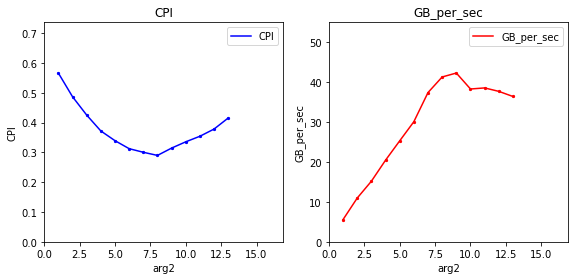

In [103]:
df = render_csv("L1_hit_machine.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


Pretty good! 

So, our processor can handle (at least) at 15 outstanding loads.  Recall that earlier, the assignment asked whether the processor cared more about (i.e., could exploit more) parallelism between arithmetic operation or memory operations.  What did you answer?  What do you think now?

Executing loads from parallel miss chains simultaneously allows the processor to "hide" memory latency:  Even though each load takes 5 cycles, running them in parallel makes it appear that each takes just 0.33 cycles on average.

It's nice to hide the 5-cycle L1 hit time, but, as you learned from the last two assignments, L1 hits are not where the real problems lie.

### L1 Misses

Let's see about hiding the latency of some L1 misses that hit in the L2.  To do this, we'll just expand the size of our miss machine to fit in the L2 but not the L1.  The L2 is 1MB, so 2MB should do it.  We'll also increase the link size to 64 bytes so we don't have any cache line reuse.

Running on the cloud for: twan012@ucr.edu
registering function: miss_machines
Dynamically registering miss_machines
Execution started
Execution completed


,index,size,arg1,arg2,arg3,IC,CPI,CT,ET,GB_per_sec
0,0,2097152,64,1,10000000,53418333,4.042341,0.275958,0.059589,1.342530
1,1,2097152,64,2,10000000,62604804,2.793002,0.302873,0.052959,3.021205
2,2,2097152,64,3,10000000,70897013,2.481316,0.294842,0.051868,4.627130
3,3,2097152,64,4,10000000,80906803,2.326408,0.276917,0.052122,6.139442
4,4,2097152,64,5,10000000,90903213,2.526479,0.274474,0.063037,6.345480
5,5,2097152,64,6,10000000,100939546,2.807871,0.274252,0.077730,6.175222
6,6,2097152,64,7,10000000,110974092,3.282653,0.283212,0.103171,5.427882
7,7,2097152,64,8,10000000,121032288,4.079556,0.282432,0.139453,4.589360
8,8,2097152,64,9,10000000,131591223,4.912587,0.272564,0.176200,4.086266
9,9,2097152,64,10,10000000,141165408,5.462212,0.276295,0.213044,3.755093


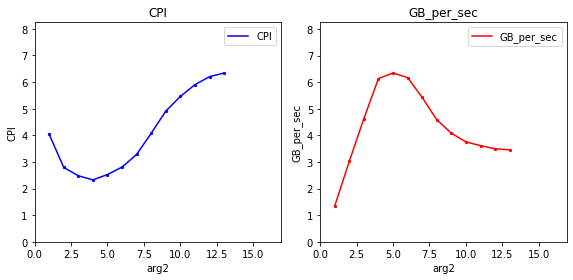

In [104]:
! cs203 run "./fiddle.exe -l ./build/miss_machines.so -f miss_machines -M 3700   -size 2097152 --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 10000000 --details -o L1_miss_machines.csv"
df = render_csv("L1_miss_machines.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


<div class="alert alert-block alert-info">

### Question 17 (Completeness)

**How many outstanding cache misses can the processor handle?**
        
**What's the peak bandwidth?**


</div>

<div class="alert alert-block alert-info">
<div class="answer">

**How many outstanding cache misses can the processor handle?** 5
    
**What's the peak bandwidth?** 6.3 GB/s

Explanation:
From the L1-miss experiment: 
1. The arg2 column is the number of parallel “miss machines” (i.e., independent miss chains).
2. The GB_per_sec column gives the achieved bandwidth.

Reading the rows: 
1. Bandwidth increases as we go from arg2 = 1 up to arg2 = 5.
2. At arg2 = 5 the bandwidth is highest: about 6.35 GB/s.
3. When we add more miss machines (arg2 > 5), the bandwidth actually starts to drop again.

So: \
Number of outstanding cache misses the processor can handle: about 5 parallel miss chains. \
Peak bandwidth: roughly 6.3 GB/s.
    
</div>
</div>

<details>
    <summary>How many outstanding cache misses can the processor handle?</summary>

In the experiment we increase the amount of MLP _in our program_ from 1 to 13 parallel load chains.  When the number of parallel load chains exceeds the number of parallel loads the processor can handle, performance stops improving (i.e., CPI stops dropping) because performance doesn't benefit from the additional parallelism.  Put another way, the program now has more ILP than the hardware can make use of.  For the data I got for this experiment this happened with 5 miss chains, so I conclude that the number of outstanding misses the processor can handle is 5.
</details>       
<details>
    <summary>What's the peak bandwidth?</summary>  This is just the highest point in the graph on the right.  For me it was about 6.5GB/s.
    
</details>

Let's go further!

## L2 Misses

Same drill:  We'll increase the miss machine size so it fit's in the L3 but not the L2:  The L3 is 24.75MB, so 32MB should be enough.

Done code generation...
Running on the cloud for: twan012@ucr.edu
registering function: miss_machines
Dynamically registering miss_machines
Execution started
Execution completed


,index,size,arg1,arg2,arg3,IC,CPI,CT,ET,GB_per_sec
0,0,2097152,64,1,100000000,504128336,3.853898,0.278875,0.541815,1.476519
1,1,2097152,64,2,100000000,603833010,3.241194,0.278671,0.545398,2.933637
2,2,2097152,64,3,100000000,701614052,2.784098,0.280755,0.548416,4.376240
3,3,2097152,64,4,100000000,802088856,2.370349,0.278617,0.529715,6.040984
4,4,2097152,64,5,100000000,901666512,2.351886,0.278418,0.590417,6.774873
5,5,2097152,64,6,100000000,1002421145,2.716815,0.278424,0.758258,6.330299
6,6,2097152,64,7,100000000,1102797630,3.289525,0.278335,1.009710,5.546147
7,7,2097152,64,8,100000000,1203876102,4.141387,0.278545,1.388748,4.608467
8,8,2097152,64,9,100000000,1303992240,5.003444,0.278713,1.818448,3.959420
9,9,2097152,64,10,100000000,1405568531,5.635590,0.278363,2.204974,3.628161


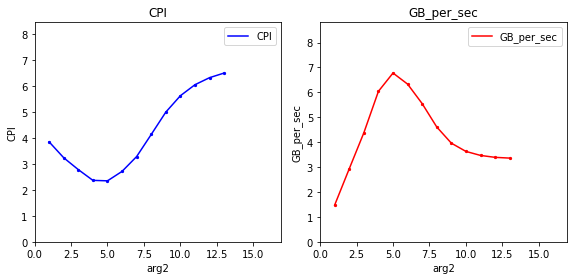

In [105]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L2_miss_machines",
           opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {16*1024*1024} --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 100000000", 
           perf_cmdline=f"--stat-set L2.cfg --MHz 3500  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")
! cs203 run "./fiddle.exe -l ./build/miss_machines.so -f miss_machines -MHz 3600 -size {2*1024*1024} --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 100000000 --details -o L2_miss_machines.csv"
df = render_csv("L2_miss_machines.csv", columns=["size", "arg1", "arg2","arg3", "IC", "CPI", "CT", "ET"])
df["GB_per_sec"] = 8*df["arg2"]*df["arg3"]/(df["ET"]*(10**9))
display_mono(df);
plotPE(df=df, lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])


About 3 misses, but just around 4 GB/s and an average latency of 3.1 cycles, and the L3 can do about 4GB/s.

We are going to stop there.  The next step would be to do L3 misses, but it would take a lot more work to get meaningful results for DRAM, and the results are strongly dependent on how our systems are configured, which we discussed (and measured the bandwidth of in Assignment 3).

# Turning In the Assignment

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers. After verifying the generated version contains the critical parts of the assignent, you need to turn in your notebook through Gradescope. 

**Step 1:**  Save your workbook!!!

In [106]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!


**Step 2:** After you complete the assignment, you will need to turn it in by creating a version of the notebook that only contains your answers. Run this command:

In [112]:
!cs203 turnin assignment.ipynb
!ls -lh assignment.turnin.ipynb

Wrote to assignment.turnin.ipynb
-rw-r--r-- 1 twan012 ucr 324K Nov 20  2025 assignment.turnin.ipynb


The date in the above file listing should show that you just created `assignment.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./assignment.turnin.ipynb](./assignment.turnin.ipynb)


**Step 4:**  Make sure all your answers are visible and not cut off the side of the page.


**Step 5:**  Commit everything. Please run the following command.

In [108]:
!git add -f assignment.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

[main 22aec2b] Yay! I am ready to turn in!
 2 files changed, 1548 insertions(+), 74 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 20 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 54.88 KiB | 2.49 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 2 local objects.
To github.com:CS203UCR/2025fa-cs203-processor-HugoWan0504.git
   dd43c39..22aec2b  main -> main


**Step 6**: 
Submit through gradescope.
- You'll have to submit to CS203's gradescope assignment.
- It'll run the autograder and return the results.